<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-из-файла" data-toc-modified-id="Изучение-общей-информации-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-наличие-дубликатов" data-toc-modified-id="Проверка-на-наличие-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка на наличие дубликатов</a></span></li><li><span><a href="#Проверка-на-наличие-пропусков" data-toc-modified-id="Проверка-на-наличие-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на наличие пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Модель-множественной-классификации" data-toc-modified-id="Модель-множественной-классификации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модель множественной классификации</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import collections
import math
from sklearn.linear_model import LogisticRegression
# импорт библиотек pandas, seaborn, matplotlib.pyplot, numpy
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format='jpg'

## Изучение общей информации из файла

In [2]:
teams_df = pd.read_excel('/Users/polzovatel/Desktop/match_df_cor.xlsx')

In [3]:
teams_df

,Unnamed: 0,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85
0,0,307,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-07-31 00:00:00,2009,2009-07-01,665318,9985,232.0,Standard de Liège,9997,Sint-Truidense VV,2,2,home,1.22,1.20,1.2,1.17,NaN,1.2,1.18,1.20,1.20,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.808501,74.817387,55.960612,64.526679,62.936322,54.201469,55.148179,65.854496,70.959165,71.189715,71.984166,71.261495,64.145491,72.947382,72.196896,71.444269,57.856927,57.832706,61.420485,64.437710,61.882694,49.327056,55.058245,52.230112,14.185890,17.363263,32.378769,18.350978,19.079602,0.0
1,1,308,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665320,9986,670.0,Sporting Charleroi,8342,Club Brugge KV,1,2,home,2.50,2.60,2.6,2.40,NaN,2.5,2.50,2.80,2.60,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,309,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665321,9984,1750.0,KSV Cercle Brugge,9991,KAA Gent,1,3,home,2.88,2.75,2.4,2.70,NaN,2.5,2.80,2.62,2.70,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.778758,66.407886,51.892321,58.159394,52.125379,48.317493,52.629870,58.233074,59.949925,64.011954,61.151951,63.762197,61.235839,63.896442,68.171040,64.413212,54.753202,57.412931,58.588969,63.331921,57.768039,48.037908,51.752491,51.047590,13.977978,19.859168,35.236765,19.588399,18.908092,0.0
3,3,310,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665322,9994,2007.0,Sporting Lokeren,10000,SV Zulte-Waregem,1,1,home,2.30,2.05,2.0,2.20,NaN,2.0,2.05,2.00,2.10,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599830,68.178904,45.837889,52.972849,55.038891,NaN,49.711835,61.733900,64.616344,62.229927,NaN,64.512423,62.781675,NaN,62.578592,64.240575,50.642890,56.755838,57.296594,NaN,57.646096,43.274332,46.455425,NaN,14.204784,20.851918,38.167292,20.505377,21.920433,0.0
4,4,311,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665323,8571,100081.0,KV Kortrijk,8635,RSC Anderlecht,0,2,home,5.75,5.50,5.0,5.50,NaN,5.0,6.50,5.50,5.25,5.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.521323,67.110101,45.098531,51.655474,48.947866,NaN,47.446495,56.295910,65.316549,66.379066,NaN,62.271180,58.510041,NaN,68.453976,61.802885,49.832253,55.813510,56.961317,NaN,55.705385,46.370312,50.301391,NaN,13.066070,21.687654,40.168090,22.308144,20.896858,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45301,45301,25975,24558,Switzerland,24558,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,2015,2015-09-01,1992091,10191,1715.0,FC Thun,10190,FC St. Gallen,0,1,away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,59.0,35.0,64.0,36.0,66.0,47.0,45.0,53.0,60.489740,66.026308,45.562925,50.129980,55.332210,45.933477,46.869071,56.861911,66.717221,64.669212,62.299691,58.559471,54

Добавляем столбцы с *результатом* матча для каждой команды на разных этапах и *разрывом* по числу голов.

In [4]:
teams_df['goals_diff'] = abs(teams_df['goals_scored'] - teams_df['missed_goals'])

In [5]:
def calc_result(df):
    if df['goals_scored'] > df['missed_goals']:
        return 'win'
    elif df['goals_scored'] < df['missed_goals']:
        return 'lose'
    else:
        return 'draw'

In [6]:
teams_df['result'] = teams_df.apply(calc_result, axis=1)

In [7]:
def get_win_name(df):
    if df['goals_scored'] > df['missed_goals']:
        return df['team_api_id']
    elif df['goals_scored'] < df['missed_goals']:
        return df['opposing_team_api_id']
    else:
        return 'draw' 

In [8]:
teams_df['win_name'] = teams_df.apply(get_win_name, axis=1)

In [9]:
teams_df = teams_df.drop(['SJ', 'GB', 'BS'], axis=1)

In [10]:
teams_df['avg_coeff'] = teams_df[['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'VC']].median(axis=1)

In [11]:
teams_df = teams_df.drop(['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'VC'], axis=1)

In [12]:
teams_df

,Unnamed: 0,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85,goals_diff,result,win_name,avg_coeff
0,0,307,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-07-31 00:00:00,2009,2009-07-01,665318,9985,232.0,Standard de Liège,9997,Sint-Truidense VV,2,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.808501,74.817387,55.960612,64.526679,62.936322,54.201469,55.148179,65.854496,70.959165,71.189715,71.984166,71.261495,64.145491,72.947382,72.196896,71.444269,57.856927,57.832706,61.420485,64.437710,61.882694,49.327056,55.058245,52.230112,14.185890,17.363263,32.378769,18.350978,19.079602,0.0,0,draw,draw,1.200
1,1,308,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665320,9986,670.0,Sporting Charleroi,8342,Club Brugge KV,1,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,lose,8342,2.550
2,2,309,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665321,9984,1750.0,KSV Cercle Brugge,9991,KAA Gent,1,3,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.778758,66.407886,51.892321,58.159394,52.125379,48.317493,52.629870,58.233074,59.949925,64.011954,61.151951,63.762197,61.235839,63.896442,68.171040,64.413212,54.753202,57.412931,58.588969,63.331921,57.768039,48.037908,51.752491,51.047590,13.977978,19.859168,35.236765,19.588399,18.908092,0.0,2,lose,9991,2.660
3,3,310,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665322,9994,2007.0,Sporting Lokeren,10000,SV Zulte-Waregem,1,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599830,68.178904,45.837889,52.972849,55.038891,NaN,49.711835,61.733900,64.616344,62.229927,NaN,64.512423,62.781675,NaN,62.578592,64.240575,50.642890,56.755838,57.296594,NaN,57.646096,43.274332,46.455425,NaN,14.204784,20.851918,38.167292,20.505377,21.920433,0.0,0,draw,draw,2.025
4,4,311,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665323,8571,100081.0,KV Kortrijk,8635,RSC Anderlecht,0,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.521323,67.110101,45.098531,51.655474,48.947866,NaN,47.446495,56.295910,65.316549,66.379066,NaN,62.271180,58.510041,NaN,68.453976,61.802885,49.832253,55.813510,56.961317,NaN,55.705385,46.370312,50.301391,NaN,13.066070,21.687654,40.168090,22.308144,20.896858,0.0,2,lose,8635,5.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45301,45301,25975,24558,Switzerland,24558,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,2015,2015-09-01,1992091,10191,1715.0,FC Thun,10190,FC St. Gallen,0,1,away,58.0,59.0,35.0,64.0,36.0,66.0,47.0,45.0,53.0,60.489740,66.026308,45.562925,50.129980,55.332210,45.933477,46.869071,56.861911,66.717221,64.669212,62.299691,58.559471,54.566128,64.130497,60.601432,64.983112,45.613335,46.550244,53.361603,53.123126,49.931017,40.248517,47.327459,44.070526,14.110741,15.067617,14.066452,14.054797,15.672513,0.0,1,lose,10190,NaN
45302,45302,259

In [13]:
teams_df = teams_df.drop('Unnamed: 0', axis=1)

In [14]:
def get_df_info(df):
    display(df.head(10))
    display(df.info())
    display(df.describe(include='all'))
# создание функции для вывода характеристик датафрейма

In [15]:
get_df_info(teams_df)
# применение функции get_df_info

,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85,goals_diff,result,win_name,avg_coeff
0,307,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-07-31 00:00:00,2009,2009-07-01,665318,9985,232.0,Standard de Liège,9997,Sint-Truidense VV,2,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.808501,74.817387,55.960612,64.526679,62.936322,54.201469,55.148179,65.854496,70.959165,71.189715,71.984166,71.261495,64.145491,72.947382,72.196896,71.444269,57.856927,57.832706,61.420485,64.437710,61.882694,49.327056,55.058245,52.230112,14.185890,17.363263,32.378769,18.350978,19.079602,0.0,0,draw,draw,1.200
1,308,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665320,9986,670.0,Sporting Charleroi,8342,Club Brugge KV,1,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,lose,8342,2.550
2,309,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665321,9984,1750.0,KSV Cercle Brugge,9991,KAA Gent,1,3,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.778758,66.407886,51.892321,58.159394,52.125379,48.317493,52.629870,58.233074,59.949925,64.011954,61.151951,63.762197,61.235839,63.896442,68.171040,64.413212,54.753202,57.412931,58.588969,63.331921,57.768039,48.037908,51.752491,51.047590,13.977978,19.859168,35.236765,19.588399,18.908092,0.0,2,lose,9991,2.660
3,310,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665322,9994,2007.0,Sporting Lokeren,10000,SV Zulte-Waregem,1,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599830,68.178904,45.837889,52.972849,55.038891,NaN,49.711835,61.733900,64.616344,62.229927,NaN,64.512423,62.781675,NaN,62.578592,64.240575,50.642890,56.755838,57.296594,NaN,57.646096,43.274332,46.455425,NaN,14.204784,20.851918,38.167292,20.505377,21.920433,0.0,0,draw,draw,2.025
4,311,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665323,8571,100081.0,KV Kortrijk,8635,RSC Anderlecht,0,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.521323,67.110101,45.098531,51.655474,48.947866,NaN,47.446495,56.295910,65.316549,66.379066,NaN,62.271180,58.510041,NaN,68.453976,61.802885,49.832253,55.813510,56.961317,NaN,55.705385,46.370312,50.301391,NaN,13.066070,21.687654,40.168090,22.308144,20.896858,0.0,2,lose,8635,5.500
5,312,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665324,8203,110724.0,KV Mechelen,10001,KVC Westerlo,4,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.111965,67.053164,45.884552,55.987441,53.984760,49.544597,50.145480,60.665513,61.972149,63.038411,61.223435,63.876828,57.479002,64.925272,68.115783,67.569508,50.526460,57.345693,55.611876,61.197395,55.030904,47.501013,53.217661,52.811714,14.622014,17.403661,27.093711,17.216427,18.437506,0.0,3,win,8203,2.275
6,313,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665325,9999,546.0,KSV Roeselare,9993,Beerschot AC,1,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,draw,draw,2.550
7,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45306 entries, 0 to 45305
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 45306 non-null  int64  
 1   country_id                         45306 non-null  int64  
 2   country                            45306 non-null  object 
 3   league_id                          45306 non-null  int64  
 4   league                             45306 non-null  object 
 5   season                             45306 non-null  object 
 6   stage                              45306 non-null  int64  
 7   date                               45306 non-null  object 
 8   year                               45306 non-null  int64  
 9   month_year                         45306 non-null  object 
 10  match_api_id                       45306 non-null  int64  
 11  team_api_id                        45306 non-null  int

None

,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85,goals_diff,result,win_name,avg_coeff
count,45306.000000,45306.000000,45306,45306.000000,45306,45306,45306.000000,45306,45306.000000,45306,4.530600e+04,45306.000000,45112.000000,45306,45306.000000,45306,45306.000000,45306.000000,45306,37630.000000,12592.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,39732.000000,41259.000000,41259.000000,41259.000000,41259.000000,39732.000000,41259.000000,41259.000000,39732.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,39732.000000,41259.000000,41259.000000,41259.000000,39732.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,45306.000000,45306,45306,39396.000000
unique,NaN,NaN,11,NaN,11,7,NaN,1491,NaN,78,NaN,NaN,NaN,283,NaN,283,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,286,NaN
top,NaN,NaN,England,NaN,England Premier League,2015/2016,NaN,2015-04-04 00:00:00,NaN,2014-03-01,NaN,NaN,NaN,St. Johnstone FC,NaN,Manchester United,NaN,NaN,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lose,draw,NaN
freq,NaN,NaN,5320,NaN,5320,6652,NaN,110,NaN,886,NaN,NaN,NaN,266,NaN,266,NaN,NaN,22653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16888,11530,NaN
mean,13200.298018,11788.478391,NaN,11788.478391,NaN,NaN,18.231934,NaN,2012.510131,NaN,1.296034e+06,10131.973138,16347.917339,NaN,10131.973138,NaN,1.359974,1.359974,NaN,52.625830,49.038755,47.878475,52.479644,54.050970,54.226893,46.474621,49.542679,52.281345,70.636867,74.749634,49.259529,58.882641,59.189472,53.653810,50.106504,64.274722,67.175653,67.735271,65.886867,68.344632,62.394639,68.278465,68.318173,68.949271,53.602087,55.690342,56.158059,59.499007,55.699034,50.388639,53.985133,51.780189,15.544031,17.017173,22.623293,17.144957,17.437859,0.105189,1.369046,NaN,NaN,3.592273
std,7449.110583,7531.134941,NaN,7531.134941,NaN,NaN,10.405998,NaN,2.068498,NaN,4.487886e+05,15070.818109,37850.928366,NaN,15070.818109,NaN,1.242820,1.242820,NaN,11.880055,9.939492,11.118788,10.471598,11.164521,10.589701,10.328037,9.992103,9.560810,5.161667,4.843133,4.742216,4.534531,4.739953,5.987224,5.349019,4.880410,3.469079,3.421936,3.616675,5.673117,5.533055,3.468189,3.273679,3.535347,5.598657,5.261068,5.278869,5.593249,5.473481,4.149523,4.552764,4.868610,1.057597,1.405663,4.721684,1.386930,1.417446,0.490530,1.219327,NaN,NaN,3.009198
min,307.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,2009.000000,NaN,6.538650e+05,1601.000000,1.000000,NaN,1601.000000,NaN,0.000000,0.000000,NaN,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,56.481213,60.282143,31.008875,42.327863,44.300560,32.988013,31.392546,47.116405,52.012870,53.576633,51.558081,50.443979,39.134052,54.216560,55.7

In [16]:
teams_df.columns

Index(['id', 'country_id', 'country', 'league_id', 'league', 'season', 'stage',
       'date', 'year', 'month_year', 'match_api_id', 'team_api_id',
       'team_fifa_api_id', 'team_long_name', 'opposing_team_api_id',
       'opposing_team_long_name', 'goals_scored', 'missed_goals', 'place',
       'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
       'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth', 'avg_overall_rating', 'avg_potential',
       'avg_finishing', 'avg_heading_accuracy', 'avg_dribbling', 'avg_curve',
       'avg_free_kick_accuracy', 'avg_ball_control', 'avg_acceleration',
       'avg_sprint_speed', 'avg_agility', 'avg_reactions', 'avg_shot_power',
       'avg_jumping', 'avg_stamina', 'avg_strength', 'avg_long_shots',
       'avg_interceptions', 'avg_positioning', 'avg_vision', 'avg_penalties',
       'avg_marking', 'avg_standing_tackle', 'avg_sliding_tac

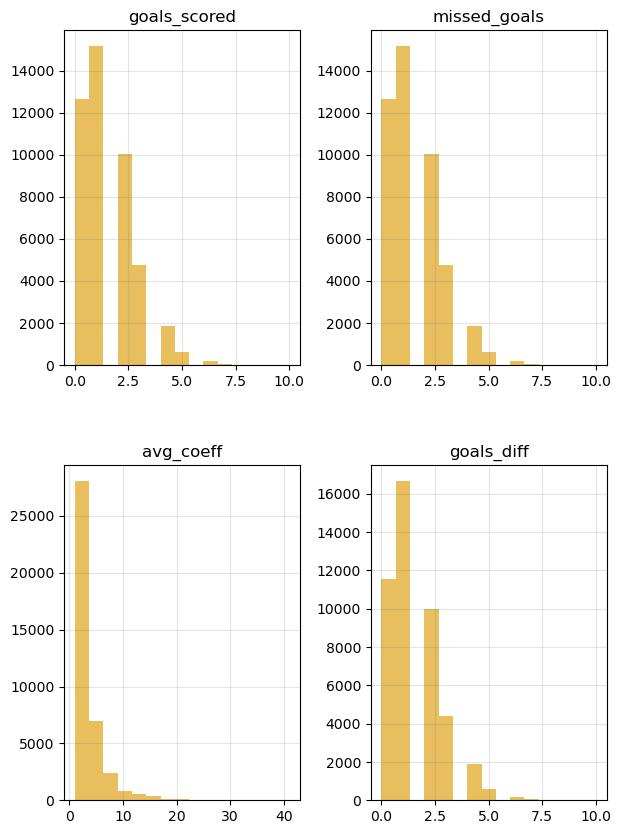

In [17]:
matplotlib.rcParams['grid.color'] = 'gray'
matplotlib.rcParams['grid.alpha'] = 0.2
ax = teams_df[['goals_scored', 
               'missed_goals', 
               'avg_coeff',
               'goals_diff']].hist(figsize=(7, 10), color='#E8BE5E', bins=15)
# вывод гистограмм для числовых столбцов таблицы

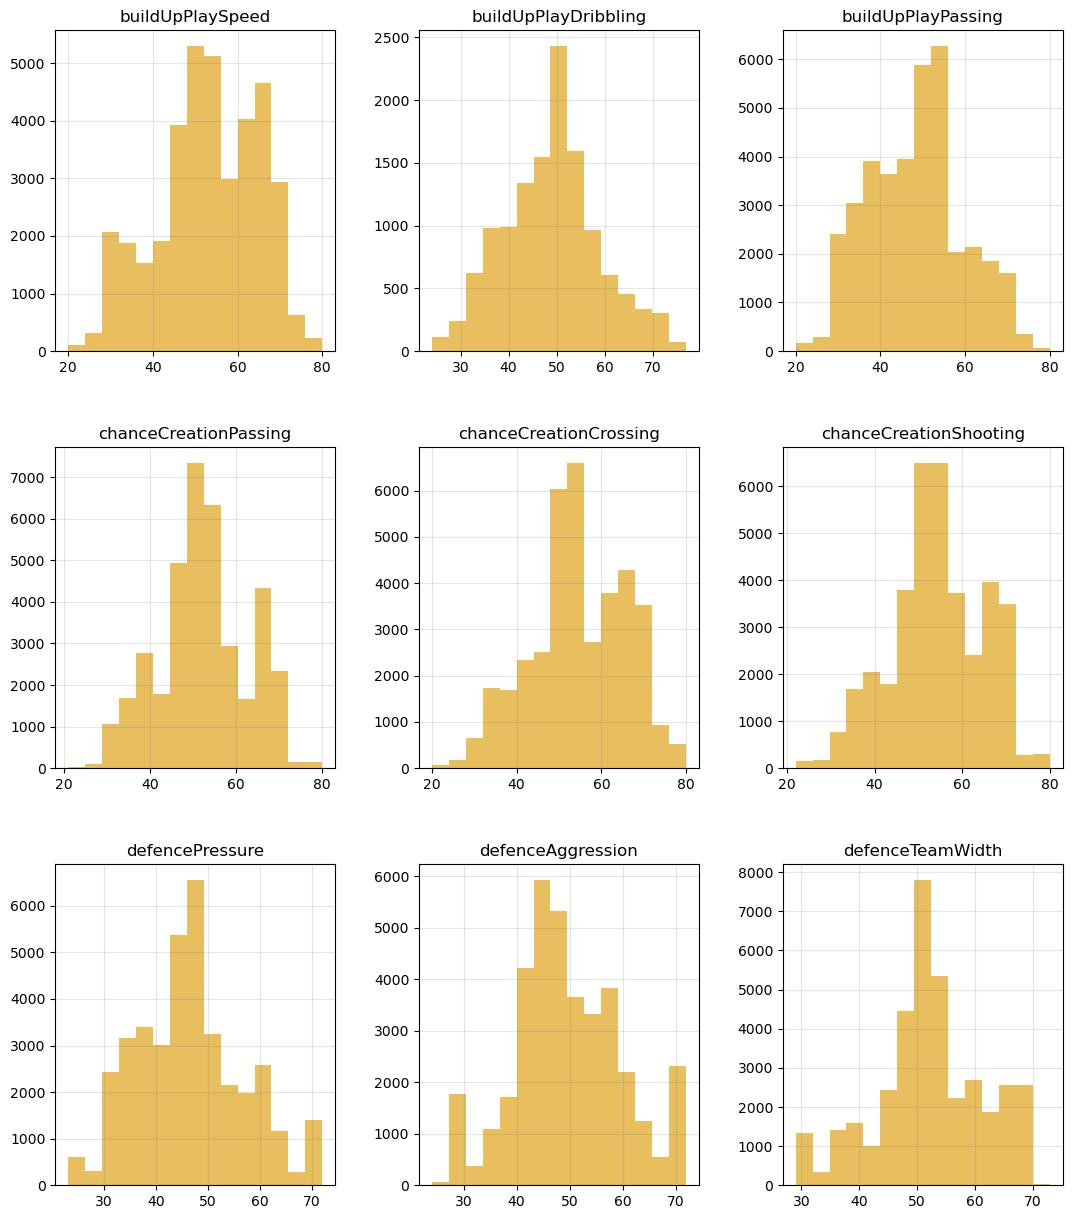

In [18]:
matplotlib.rcParams['grid.color'] = 'gray'
matplotlib.rcParams['grid.alpha'] = 0.2
ax = teams_df[['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
       'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth']].hist(figsize=(13, 15), color='#E8BE5E', bins=15)
# вывод гистограмм для числовых столбцов таблицы

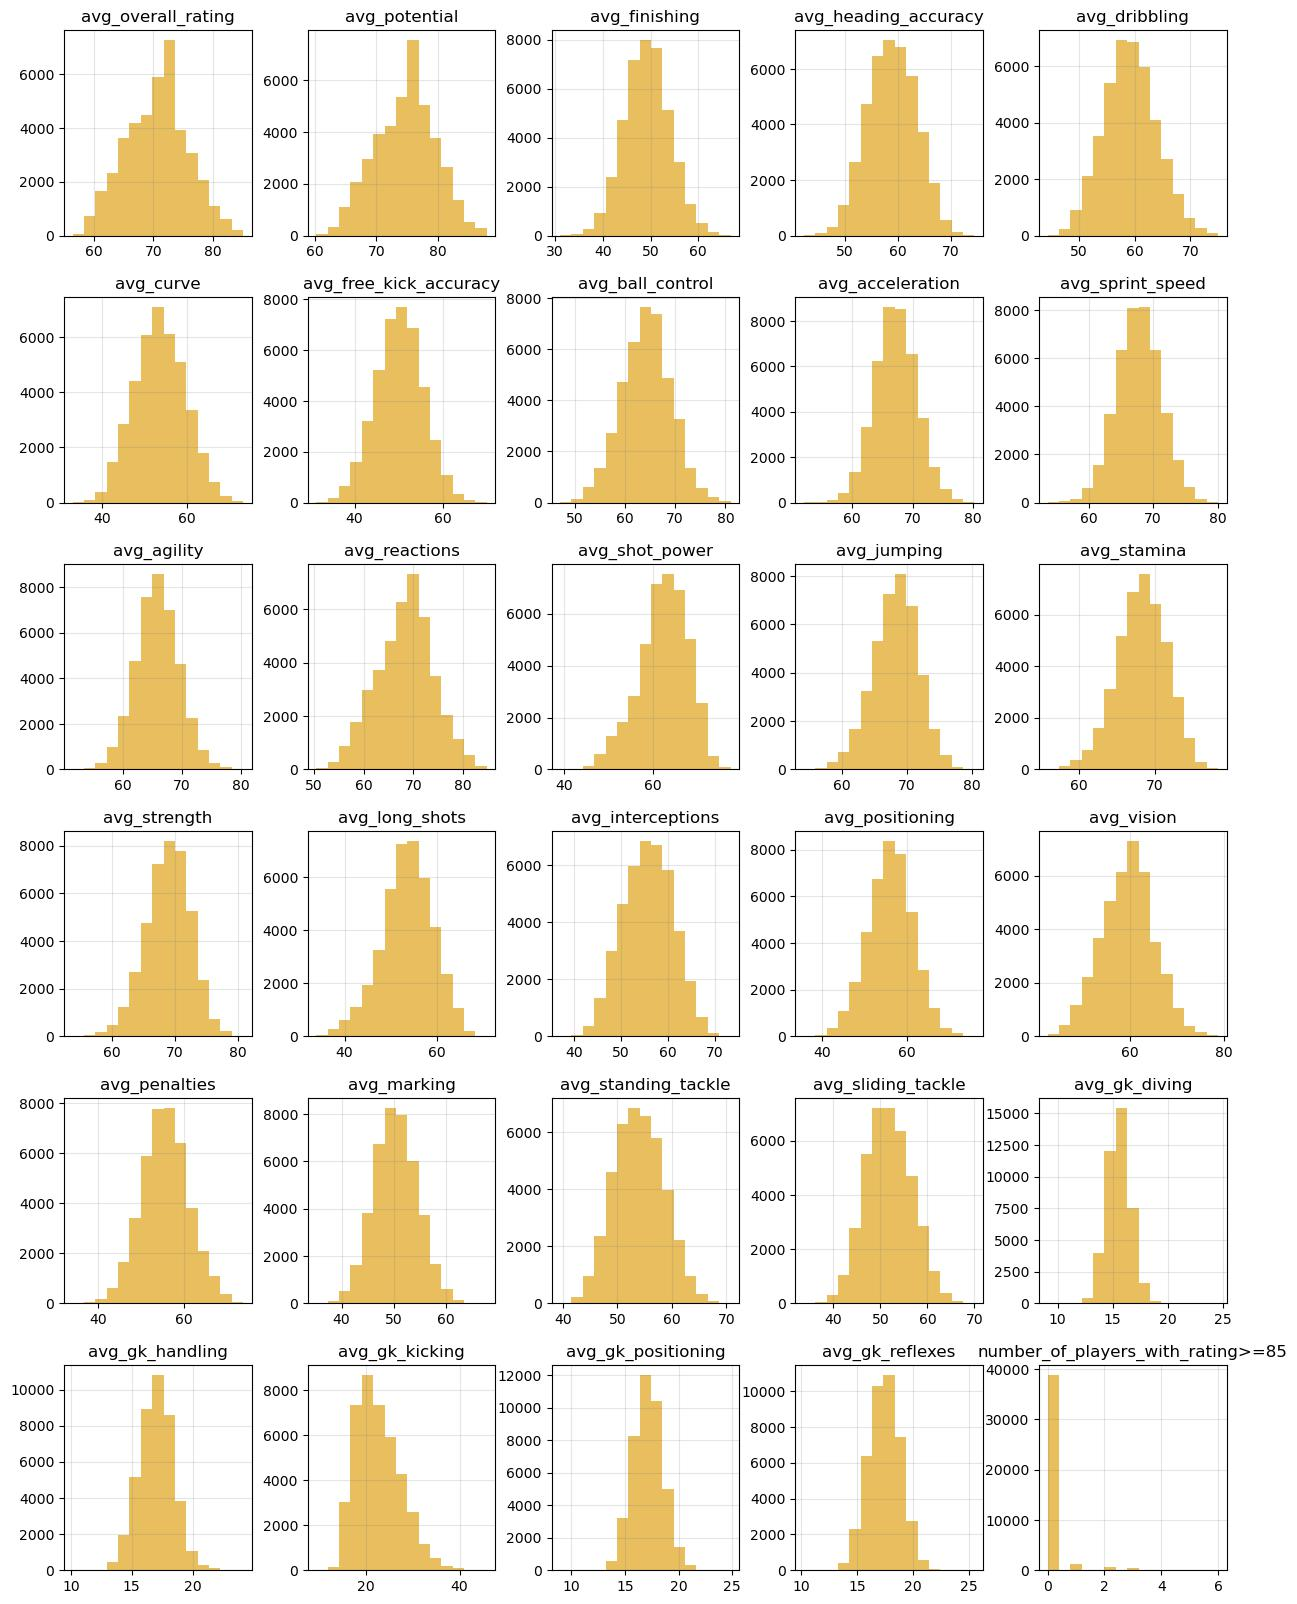

In [19]:
matplotlib.rcParams['grid.color'] = 'gray'
matplotlib.rcParams['grid.alpha'] = 0.2
ax = teams_df[['avg_overall_rating', 'avg_potential',
       'avg_finishing', 'avg_heading_accuracy', 'avg_dribbling', 'avg_curve',
       'avg_free_kick_accuracy', 'avg_ball_control', 'avg_acceleration',
       'avg_sprint_speed', 'avg_agility', 'avg_reactions', 'avg_shot_power',
       'avg_jumping', 'avg_stamina', 'avg_strength', 'avg_long_shots',
       'avg_interceptions', 'avg_positioning', 'avg_vision', 'avg_penalties',
       'avg_marking', 'avg_standing_tackle', 'avg_sliding_tackle',
       'avg_gk_diving', 'avg_gk_handling', 'avg_gk_kicking',
       'avg_gk_positioning', 'avg_gk_reflexes',
       'number_of_players_with_rating>=85']].hist(figsize=(15, 20), color='#E8BE5E', bins=15)
# вывод гистограмм для числовых столбцов таблицы

## Предобработка данных

### Проверка на наличие дубликатов

In [20]:
print(teams_df.duplicated().sum())
# подсчёт явных дубликатов

0


In [21]:
teams_df.head()

,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85,goals_diff,result,win_name,avg_coeff
0,307,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-07-31 00:00:00,2009,2009-07-01,665318,9985,232.0,Standard de Liège,9997,Sint-Truidense VV,2,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.808501,74.817387,55.960612,64.526679,62.936322,54.201469,55.148179,65.854496,70.959165,71.189715,71.984166,71.261495,64.145491,72.947382,72.196896,71.444269,57.856927,57.832706,61.420485,64.437710,61.882694,49.327056,55.058245,52.230112,14.185890,17.363263,32.378769,18.350978,19.079602,0.0,0,draw,draw,1.200
1,308,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665320,9986,670.0,Sporting Charleroi,8342,Club Brugge KV,1,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,lose,8342,2.550
2,309,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02 00:00:00,2009,2009-08-01,665321,9984,1750.0,KSV Cercle Brugge,9991,KAA Gent,1,3,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.778758,66.407886,51.892321,58.159394,52.125379,48.317493,52.629870,58.233074,59.949925,64.011954,61.151951,63.762197,61.235839,63.896442,68.171040,64.413212,54.753202,57.412931,58.588969,63.331921,57.768039,48.037908,51.752491,51.047590,13.977978,19.859168,35.236765,19.588399,18.908092,0.0,2,lose,9991,2.660
3,310,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665322,9994,2007.0,Sporting Lokeren,10000,SV Zulte-Waregem,1,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599830,68.178904,45.837889,52.972849,55.038891,NaN,49.711835,61.733900,64.616344,62.229927,NaN,64.512423,62.781675,NaN,62.578592,64.240575,50.642890,56.755838,57.296594,NaN,57.646096,43.274332,46.455425,NaN,14.204784,20.851918,38.167292,20.505377,21.920433,0.0,0,draw,draw,2.025
4,311,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01 00:00:00,2009,2009-08-01,665323,8571,100081.0,KV Kortrijk,8635,RSC Anderlecht,0,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.521323,67.110101,45.098531,51.655474,48.947866,NaN,47.446495,56.295910,65.316549,66.379066,NaN,62.271180,58.510041,NaN,68.453976,61.802885,49.832253,55.813510,56.961317,NaN,55.705385,46.370312,50.301391,NaN,13.066070,21.687654,40.168090,22.308144,20.896858,0.0,2,lose,8635,5.500


In [22]:
len(teams_df['match_api_id'].unique())

22653

Всего за все сезоны было проведено **22653 матчей**. Один и тот же матч отображается 2 раза, так как для одной команды он был *домашним*, а для другой - *выездным*. Результаты конкретного матча для каждой команды с уникальными характеристиками выводим по-отдельности.

In [23]:
teams_df['match_api_id'].value_counts()

665318     2
1722113    2
1994620    2
1994619    2
1994618    2
          ..
1030379    2
1030376    2
1030374    2
1030372    2
1992095    2
Name: match_api_id, Length: 22653, dtype: int64

In [24]:
len(teams_df['team_api_id'].unique())

285

In [25]:
len(teams_df['opposing_team_api_id'].unique())

285

In [26]:
intersection_list = set(list(teams_df['team_api_id'].unique())).intersection(set(list(teams_df['opposing_team_api_id'].unique())))
len(intersection_list)

285

Уникальных команд - **285**.

In [27]:
for column in ['stage', 'place', 'league', 'country', 'result']:
    print(f'Категориальный признак {column}, уникальные значения:')
    print('')
    print(teams_df[column].unique())
    print('')
    print('')

Категориальный признак stage, уникальные значения:

[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
  4  5  6  7  8  9 31 32 33 34 35 36 37 38]


Категориальный признак place, уникальные значения:

['home' 'away']


Категориальный признак league, уникальные значения:

['Belgium Jupiler League' 'England Premier League' 'France Ligue 1'
 'Germany 1. Bundesliga' 'Italy Serie A' 'Netherlands Eredivisie'
 'Poland Ekstraklasa' 'Portugal Liga ZON Sagres' 'Scotland Premier League'
 'Spain LIGA BBVA' 'Switzerland Super League']


Категориальный признак country, уникальные значения:

['Belgium' 'England' 'France' 'Germany' 'Italy' 'Netherlands' 'Poland'
 'Portugal' 'Scotland' 'Spain' 'Switzerland']


Категориальный признак result, уникальные значения:

['draw' 'lose' 'win']




### Проверка на наличие пропусков

In [28]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45306 entries, 0 to 45305
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 45306 non-null  int64  
 1   country_id                         45306 non-null  int64  
 2   country                            45306 non-null  object 
 3   league_id                          45306 non-null  int64  
 4   league                             45306 non-null  object 
 5   season                             45306 non-null  object 
 6   stage                              45306 non-null  int64  
 7   date                               45306 non-null  object 
 8   year                               45306 non-null  int64  
 9   month_year                         45306 non-null  object 
 10  match_api_id                       45306 non-null  int64  
 11  team_api_id                        45306 non-null  int

In [29]:
teams_df.isna().sum()

id                                      0
country_id                              0
country                                 0
league_id                               0
league                                  0
                                     ... 
number_of_players_with_rating>=85    4047
goals_diff                              0
result                                  0
win_name                                0
avg_coeff                            5910
Length: 62, dtype: int64

### Изменение типов данных

In [30]:
teams_df['date'] = pd.to_datetime(teams_df['date'], format='%Y-%m-%d %H:%M:%S') 
teams_df['month_year'] = pd.to_datetime(teams_df['month_year'], format='%Y-%m-%d %H:%M:%S') 

In [31]:
teams_df['date'].min()

Timestamp('2009-07-11 00:00:00')

In [32]:
teams_df['date'].max()

Timestamp('2016-05-25 00:00:00')

In [33]:
len(teams_df['date'].unique())

1491

## Исследовательский анализ данных

In [34]:
teams_df.head()

,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85,goals_diff,result,win_name,avg_coeff
0,307,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-07-31,2009,2009-07-01,665318,9985,232.0,Standard de Liège,9997,Sint-Truidense VV,2,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.808501,74.817387,55.960612,64.526679,62.936322,54.201469,55.148179,65.854496,70.959165,71.189715,71.984166,71.261495,64.145491,72.947382,72.196896,71.444269,57.856927,57.832706,61.420485,64.437710,61.882694,49.327056,55.058245,52.230112,14.185890,17.363263,32.378769,18.350978,19.079602,0.0,0,draw,draw,1.200
1,308,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02,2009,2009-08-01,665320,9986,670.0,Sporting Charleroi,8342,Club Brugge KV,1,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,lose,8342,2.550
2,309,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02,2009,2009-08-01,665321,9984,1750.0,KSV Cercle Brugge,9991,KAA Gent,1,3,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.778758,66.407886,51.892321,58.159394,52.125379,48.317493,52.629870,58.233074,59.949925,64.011954,61.151951,63.762197,61.235839,63.896442,68.171040,64.413212,54.753202,57.412931,58.588969,63.331921,57.768039,48.037908,51.752491,51.047590,13.977978,19.859168,35.236765,19.588399,18.908092,0.0,2,lose,9991,2.660
3,310,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01,2009,2009-08-01,665322,9994,2007.0,Sporting Lokeren,10000,SV Zulte-Waregem,1,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599830,68.178904,45.837889,52.972849,55.038891,NaN,49.711835,61.733900,64.616344,62.229927,NaN,64.512423,62.781675,NaN,62.578592,64.240575,50.642890,56.755838,57.296594,NaN,57.646096,43.274332,46.455425,NaN,14.204784,20.851918,38.167292,20.505377,21.920433,0.0,0,draw,draw,2.025
4,311,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01,2009,2009-08-01,665323,8571,100081.0,KV Kortrijk,8635,RSC Anderlecht,0,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.521323,67.110101,45.098531,51.655474,48.947866,NaN,47.446495,56.295910,65.316549,66.379066,NaN,62.271180,58.510041,NaN,68.453976,61.802885,49.832253,55.813510,56.961317,NaN,55.705385,46.370312,50.301391,NaN,13.066070,21.687654,40.168090,22.308144,20.896858,0.0,2,lose,8635,5.500


In [35]:
league_grouped = (teams_df
 .groupby(['season', 'country', 'league'])
 .agg(stage_num = ('stage', 'nunique'),
      match_num = ('match_api_id', 'nunique'), 
      teams_num = ('team_api_id', 'nunique'), 
      team_avg_goals = ('goals_scored', 'mean'),
      goals_sum = ('goals_scored', 'sum'),
      avg_goals_diff = ('goals_diff', 'mean'))
 .reset_index()           
)
league_grouped['match_avg_goals'] = league_grouped['goals_sum'] / league_grouped['match_num']
league_grouped.sort_values(by='match_avg_goals', ascending=False)

,season,country,league,stage_num,match_num,teams_num,team_avg_goals,goals_sum,avg_goals_diff,match_avg_goals
10,2009/2010,Switzerland,Switzerland Super League,36,180,10,1.663889,599,1.705556,3.327778
27,2011/2012,Netherlands,Netherlands Eredivisie,34,306,18,1.629085,997,1.754902,3.258170
16,2010/2011,Netherlands,Netherlands Eredivisie,34,306,18,1.612745,987,1.604575,3.225490
49,2013/2014,Netherlands,Netherlands Eredivisie,34,306,18,1.598039,978,1.437908,3.196078
47,2013/2014,Germany,Germany 1. Bundesliga,34,306,18,1.580065,967,1.598039,3.160131
...,...,...,...,...,...,...,...,...,...,...
17,2010/2011,Poland,Poland Ekstraklasa,30,240,16,1.204167,578,1.283333,2.408333
51,2013/2014,Portugal,Portugal Liga ZON Sagres,30,240,16,1.185417,569,1.279167,2.370833
13,2010/2011,France,France Ligue 1,38,380,20,1.171053,890,1.105263,2.342105
6,2009/2010,Poland,Poland Ekstraklasa,30,240,16,1.108333,532,1.158333,2.216667


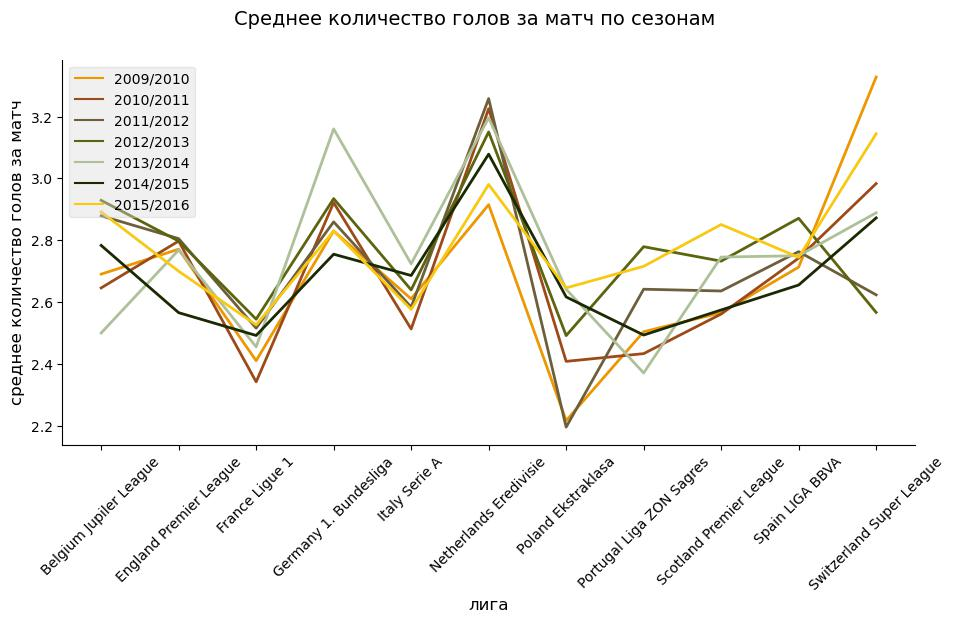

In [36]:
fig = plt.figure(figsize=(11, 5))
fig.suptitle('Среднее количество голов за матч по сезонам', fontsize=14)
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

sns.lineplot(data=league_grouped, x='league', y='match_avg_goals', hue='season', ax=ax1, palette=['#EC9704', '#9C4A1A', '#6D5E3C', '#5c640f', '#AEC09A', '#1A2902', '#F7C815'], linewidth=2)

plt.xticks(rotation = 45)
ax1.set_xlabel('лига', fontsize=12)
ax1.set_ylabel('среднее количество голов за матч', fontsize=12)
ax1.legend(loc='upper left', facecolor='#dbdbdb', framealpha=0.4)

plt.show()

In [37]:
teams_goals_grouped = (teams_df
 .groupby(['season', 'league', 'team_long_name', 'place'])
 .agg(match_num = ('match_api_id', 'nunique'), 
      team_avg_goals = ('goals_scored', 'mean'),
      goals_sum = ('goals_scored', 'sum'),
      avg_goals_diff = ('goals_diff', 'mean'))
 .reset_index()              
)
teams_goals_grouped

,season,league,team_long_name,place,match_num,team_avg_goals,goals_sum,avg_goals_diff
0,2009/2010,Belgium Jupiler League,Beerschot AC,away,14,0.714286,10,1.214286
1,2009/2010,Belgium Jupiler League,Beerschot AC,home,14,1.428571,20,1.714286
2,2009/2010,Belgium Jupiler League,Club Brugge KV,away,14,2.000000,28,1.357143
3,2009/2010,Belgium Jupiler League,Club Brugge KV,home,14,1.714286,24,1.000000
4,2009/2010,Belgium Jupiler League,KAA Gent,away,14,1.642857,23,1.357143
...,...,...,...,...,...,...,...,...
2577,2015/2016,Switzerland Super League,FC Zürich,home,18,1.611111,29,1.166667
2578,2015/2016,Switzerland Super League,Grasshopper Club Zürich,away,18,1.666667,30,1.166667
2579,2015/2016,Switzerland Super League,Grasshopper Club Zürich,home,18,1.944444,35,1.777778
2580,2015/2016,Switzerland Super League,Lugano,away,18,1.166667,21,1.944444


In [38]:
def show_top_teams_goals(season_name):
    fig = plt.figure(figsize=(11, 5))
    fig.suptitle(f'Топ-7 команд по среднему числу голов за матч в сезоне {season_name}:', fontsize=14)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    (teams_goals_grouped
         .query(f'place == "home" and season == "{season_name}"')
         .head(7)
         .sort_values(by='team_avg_goals', ascending=False)
         .plot(x='team_long_name',
               y='team_avg_goals', 
               kind='bar', 
               color='#5c640f', 
               legend=False, 
               ax=ax1,
               width=0.6)
    )
    (teams_goals_grouped
         .query(f'place == "away" and season == "{season_name}"')
         .head(7)
         .sort_values(by='team_avg_goals', ascending=False)
         .plot(x='team_long_name',
               y='team_avg_goals', 
               kind='bar', 
               color='#E8BE5E', 
               legend=False, 
               ax=ax2,
               width=0.6)
    )
    plt.xticks(rotation = 45)
    ax1.set_title('играли дома', fontsize=14, loc='left')
    ax2.set_title('играли в гостях', fontsize=14, loc='left')
    ax1.set_xlabel('команда', fontsize=12)
    ax2.set_xlabel('команда', fontsize=12)
    ax1.set_ylabel('среднее число голов за матч', fontsize=12)
    ax1.set_xticklabels(teams_goals_grouped
                        .query(f'place == "home" and season == "{season_name}"')
                        .head(7)
                        .sort_values(by='team_avg_goals', ascending=False)['team_long_name'], rotation=45)
    
    return plt.show()
    # функция для построения столбчатых диарамм

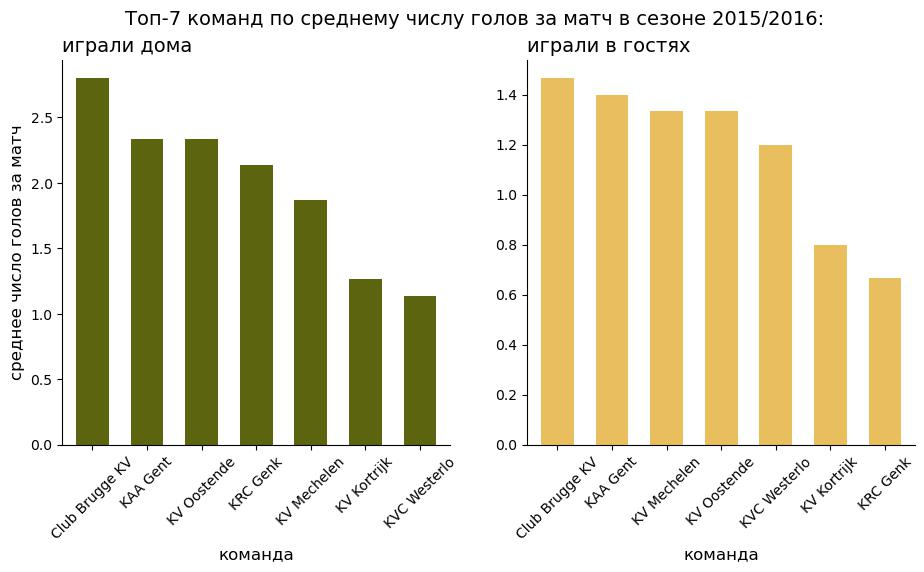

In [39]:
show_top_teams_goals('2015/2016')

In [40]:
teams_results_grouped = (teams_df
 .pivot_table(index=['season', 'league', 'team_long_name', 'place'], 
              columns='result', 
              values='team_api_id', 
              aggfunc='count')
 .reset_index()  
)
teams_results_grouped.columns = ['season', 'league', 'team_long_name', 'place', 'draw', 'lose', 'win']

teams_match_num = (teams_df
 .groupby(['season', 'league', 'team_long_name', 'place'])['match_api_id']
 .count()
 .reset_index()  
)
teams_match_num.columns = ['season', 'league', 'team_long_name', 'place', 'match_num']

In [41]:
teams_results_grouped = teams_results_grouped.merge(teams_match_num, on=['season', 'league', 'team_long_name', 'place'], how='left')

In [42]:
teams_results_grouped

,season,league,team_long_name,place,draw,lose,win,match_num
0,2009/2010,Belgium Jupiler League,Beerschot AC,away,4.0,7.0,3.0,14
1,2009/2010,Belgium Jupiler League,Beerschot AC,home,4.0,4.0,6.0,14
2,2009/2010,Belgium Jupiler League,Club Brugge KV,away,3.0,4.0,7.0,14
3,2009/2010,Belgium Jupiler League,Club Brugge KV,home,3.0,1.0,10.0,14
4,2009/2010,Belgium Jupiler League,KAA Gent,away,4.0,3.0,7.0,14
...,...,...,...,...,...,...,...,...
2577,2015/2016,Switzerland Super League,FC Zürich,home,7.0,7.0,4.0,18
2578,2015/2016,Switzerland Super League,Grasshopper Club Zürich,away,5.0,7.0,6.0,18
2579,2015/2016,Switzerland Super League,Grasshopper Club Zürich,home,3.0,6.0,9.0,18
2580,2015/2016,Switzerland Super League,Lugano,away,4.0,11.0,3.0,18


In [43]:
def show_top_teams_wins(season_name):
    fig = plt.figure(figsize=(11, 5))
    fig.suptitle(f'Топ-7 команд по количеству выигранных матчей в сезоне {season_name}:', fontsize=14)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    (teams_results_grouped
         .query(f'place == "home" and season == "{season_name}"')
         .head(7)
         .sort_values(by='win', ascending=False)
         .plot(x='team_long_name',
               y='win', 
               kind='bar', 
               color='#5c640f', 
               legend=False, 
               ax=ax1,
               width=0.6)
    )
    (teams_results_grouped
         .query(f'place == "away" and season == "{season_name}"')
         .head(7)
         .sort_values(by='win', ascending=False)
         .plot(x='team_long_name',
               y='win', 
               kind='bar', 
               color='#E8BE5E', 
               legend=False, 
               ax=ax2,
               width=0.6)
    )
    plt.xticks(rotation = 45)
    ax1.set_title('играли дома', fontsize=14, loc='left')
    ax2.set_title('играли в гостях', fontsize=14, loc='left')
    ax1.set_xlabel('команда', fontsize=12)
    ax2.set_xlabel('команда', fontsize=12)
    ax1.set_ylabel('число выигранных матчей', fontsize=12)
    ax1.set_xticklabels(teams_results_grouped
                        .query(f'place == "home" and season == "{season_name}"')
                        .head(7)
                        .sort_values(by='win', ascending=False)['team_long_name'], rotation=45)
    
    return plt.show()
    # функция для построения столбчатых диарамм

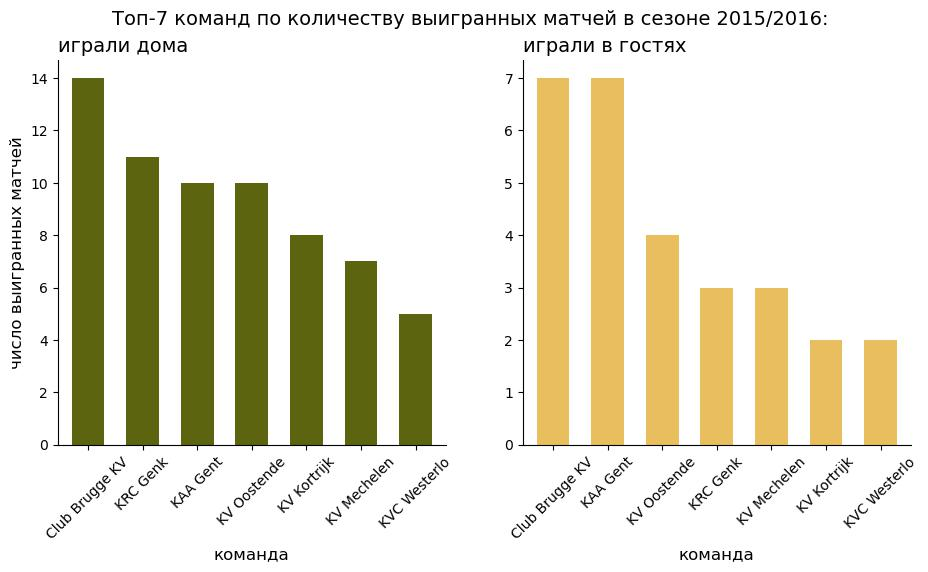

In [44]:
show_top_teams_wins('2015/2016')

## Корреляционный анализ

In [45]:
teams_df.head()

,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85,goals_diff,result,win_name,avg_coeff
0,307,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-07-31,2009,2009-07-01,665318,9985,232.0,Standard de Liège,9997,Sint-Truidense VV,2,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.808501,74.817387,55.960612,64.526679,62.936322,54.201469,55.148179,65.854496,70.959165,71.189715,71.984166,71.261495,64.145491,72.947382,72.196896,71.444269,57.856927,57.832706,61.420485,64.437710,61.882694,49.327056,55.058245,52.230112,14.185890,17.363263,32.378769,18.350978,19.079602,0.0,0,draw,draw,1.200
1,308,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02,2009,2009-08-01,665320,9986,670.0,Sporting Charleroi,8342,Club Brugge KV,1,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,lose,8342,2.550
2,309,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02,2009,2009-08-01,665321,9984,1750.0,KSV Cercle Brugge,9991,KAA Gent,1,3,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.778758,66.407886,51.892321,58.159394,52.125379,48.317493,52.629870,58.233074,59.949925,64.011954,61.151951,63.762197,61.235839,63.896442,68.171040,64.413212,54.753202,57.412931,58.588969,63.331921,57.768039,48.037908,51.752491,51.047590,13.977978,19.859168,35.236765,19.588399,18.908092,0.0,2,lose,9991,2.660
3,310,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01,2009,2009-08-01,665322,9994,2007.0,Sporting Lokeren,10000,SV Zulte-Waregem,1,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599830,68.178904,45.837889,52.972849,55.038891,NaN,49.711835,61.733900,64.616344,62.229927,NaN,64.512423,62.781675,NaN,62.578592,64.240575,50.642890,56.755838,57.296594,NaN,57.646096,43.274332,46.455425,NaN,14.204784,20.851918,38.167292,20.505377,21.920433,0.0,0,draw,draw,2.025
4,311,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01,2009,2009-08-01,665323,8571,100081.0,KV Kortrijk,8635,RSC Anderlecht,0,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.521323,67.110101,45.098531,51.655474,48.947866,NaN,47.446495,56.295910,65.316549,66.379066,NaN,62.271180,58.510041,NaN,68.453976,61.802885,49.832253,55.813510,56.961317,NaN,55.705385,46.370312,50.301391,NaN,13.066070,21.687654,40.168090,22.308144,20.896858,0.0,2,lose,8635,5.500


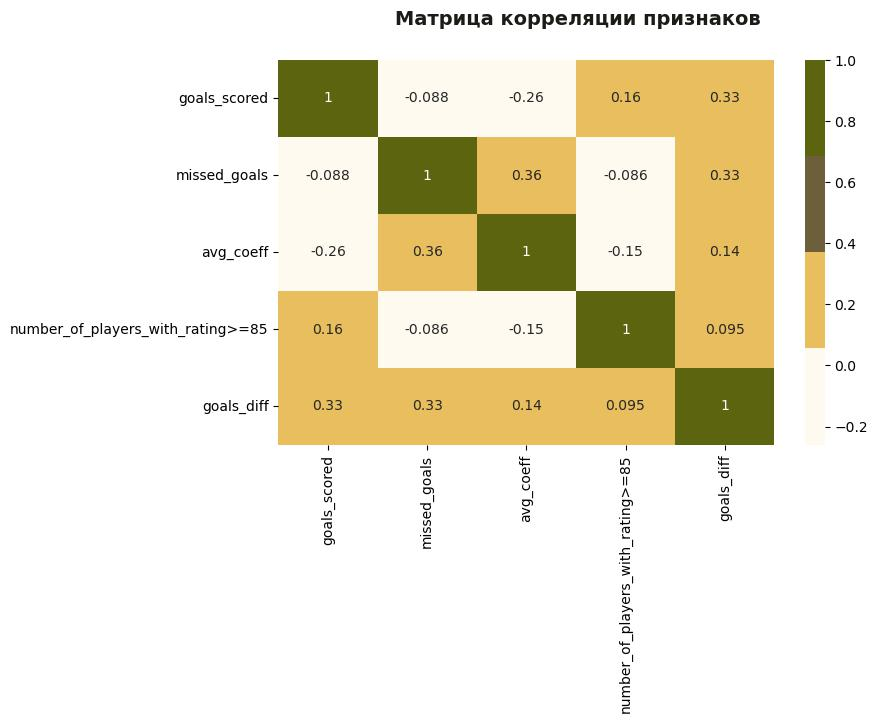

In [46]:
fig = plt.figure(figsize=(8, 5))
fig.suptitle('Матрица корреляции признаков', fontsize=14, fontweight='demi', color='#1B1B17')
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(teams_df[['goals_scored',
          'missed_goals', 
          'avg_coeff',            
          'number_of_players_with_rating>=85', 
          'goals_diff']].corr(), ax=ax1, cmap=['#fefaef', '#E8BE5E', '#6D5E3C', '#5c640f'], annot=True)

plt.show()
# построение тепловой карты

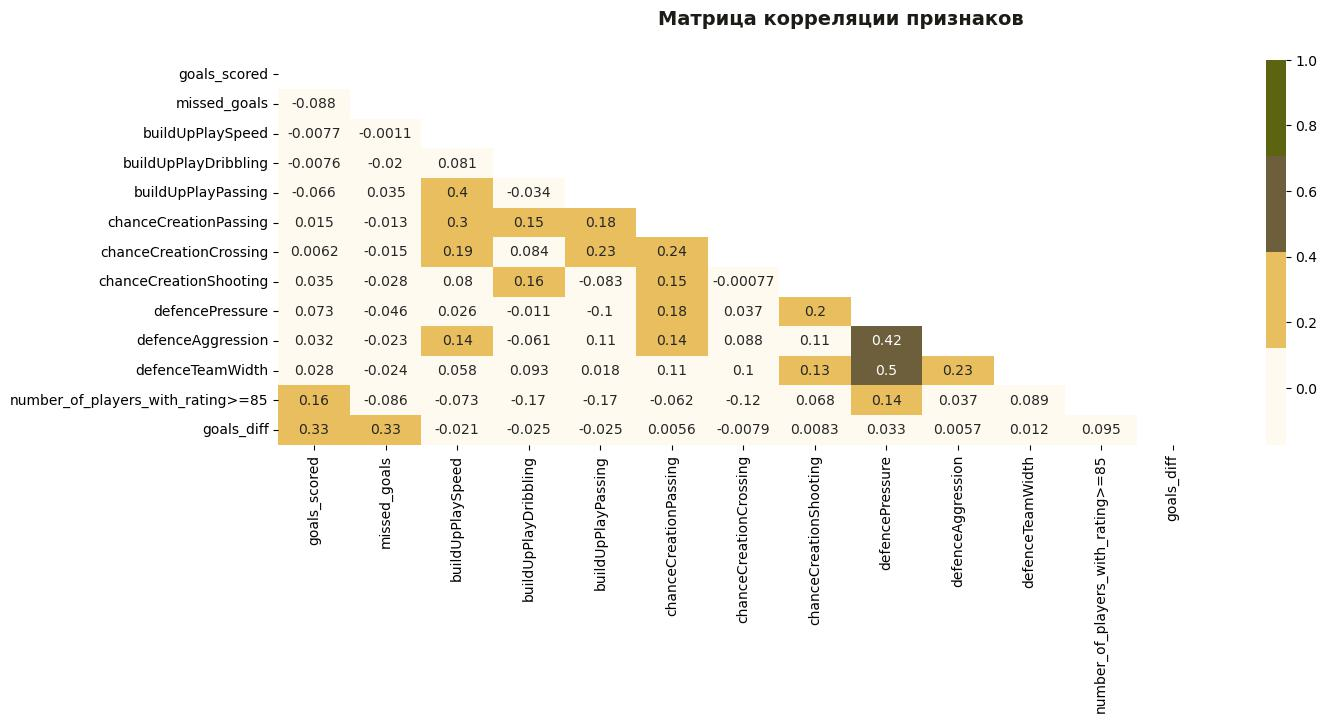

In [47]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Матрица корреляции признаков', fontsize=14, fontweight='demi', color='#1B1B17')
ax1 = fig.add_subplot(1, 1, 1)
corrmat = teams_df[['goals_scored', 
          'missed_goals', 
          'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
          'chanceCreationPassing', 'chanceCreationCrossing',
          'chanceCreationShooting', 'defencePressure', 'defenceAggression',
          'defenceTeamWidth',           
          'number_of_players_with_rating>=85', 
          'goals_diff']].corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, ax=ax1, cmap=['#fefaef', '#E8BE5E', '#6D5E3C', '#5c640f'], vmax=1, annot=True, mask=mask)

plt.show()
# построение тепловой карты

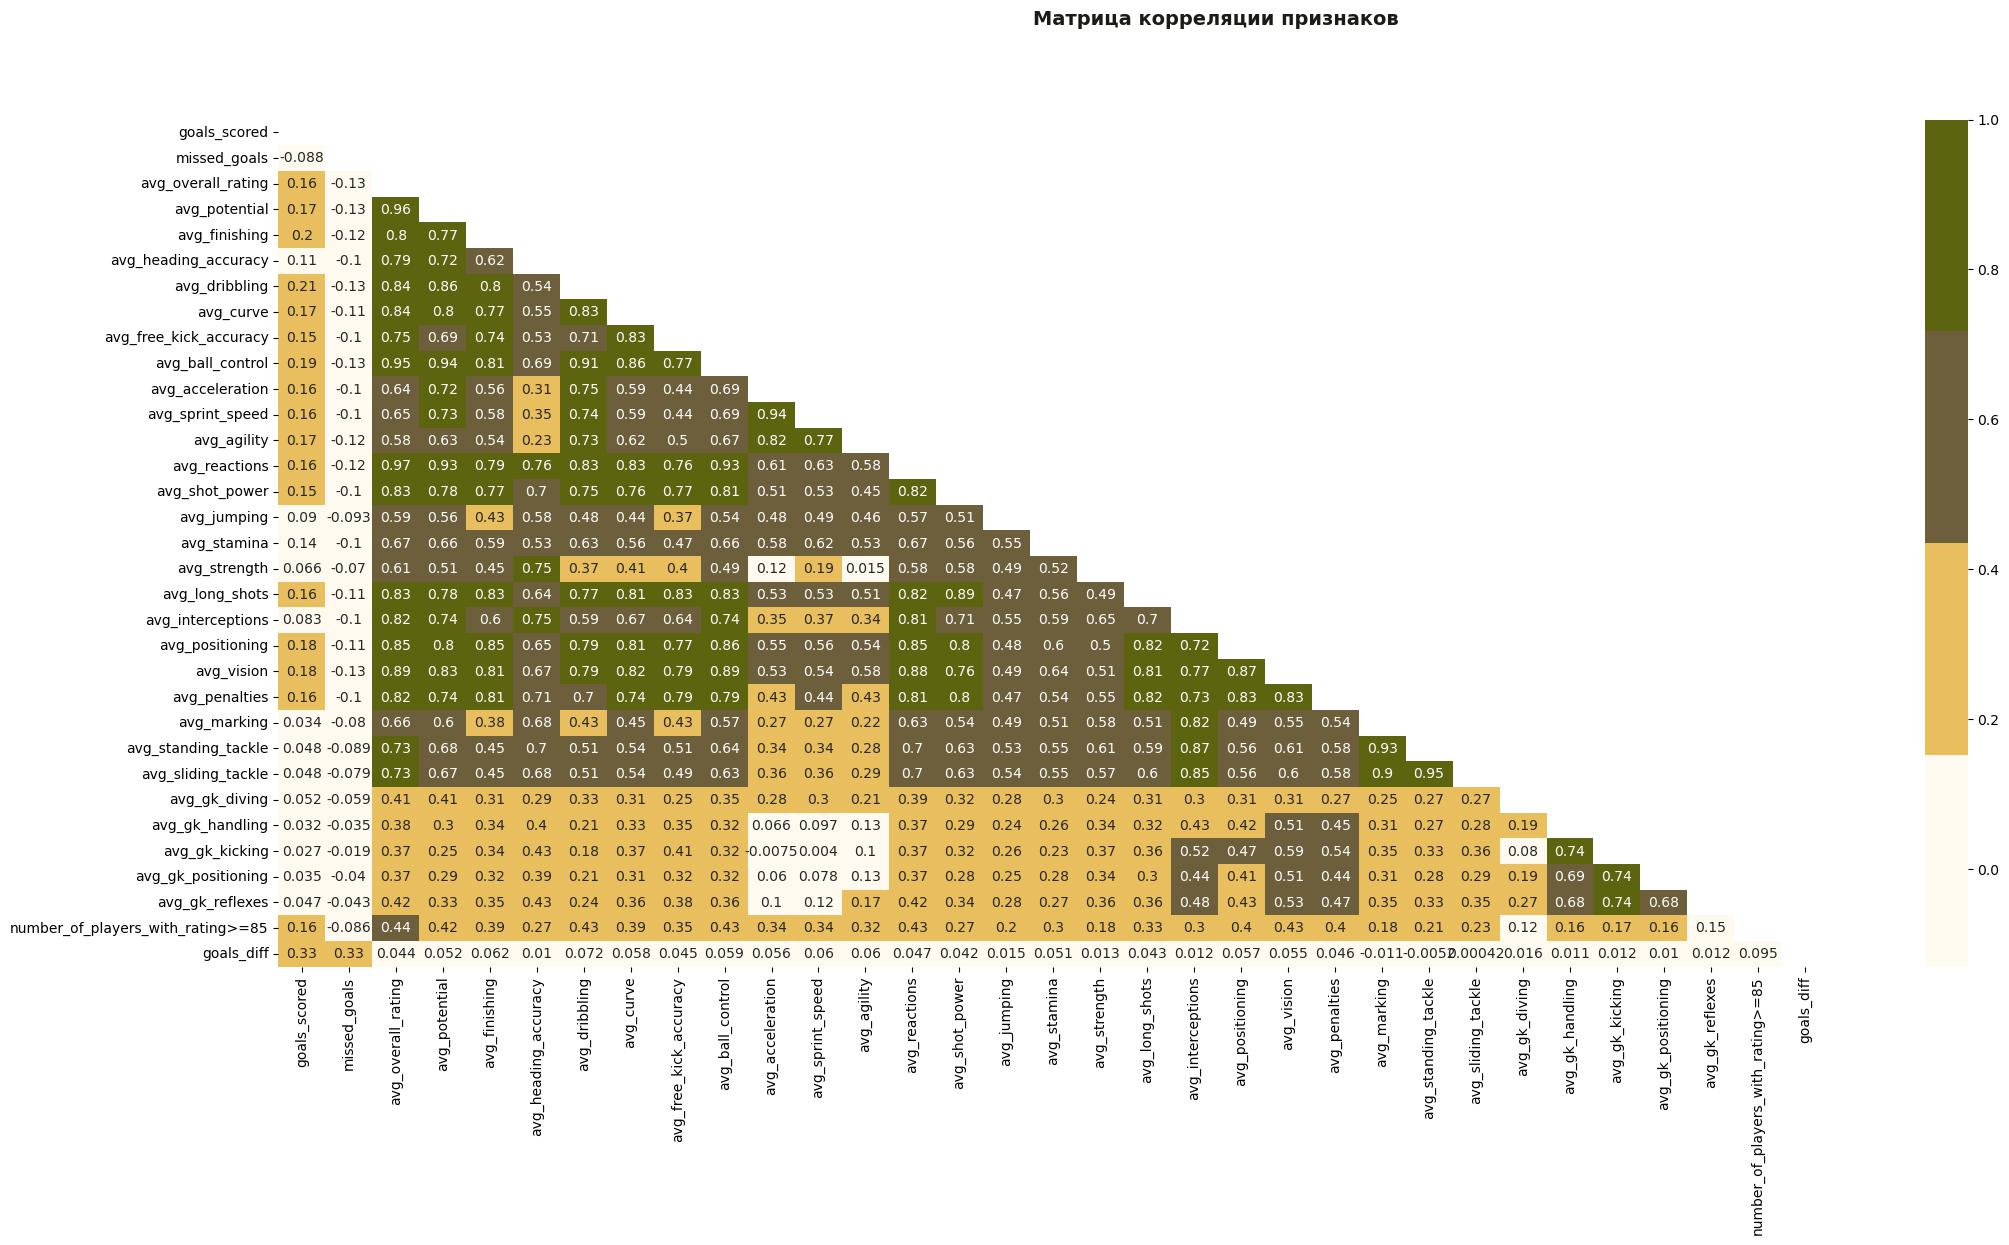

In [48]:
fig = plt.figure(figsize=(25, 11))
fig.suptitle('Матрица корреляции признаков', fontsize=14, fontweight='demi', color='#1B1B17')
ax1 = fig.add_subplot(1, 1, 1)
corrmat = teams_df[['goals_scored', 
          'missed_goals', 
          'avg_overall_rating', 'avg_potential',
          'avg_finishing', 'avg_heading_accuracy', 'avg_dribbling', 'avg_curve',
          'avg_free_kick_accuracy', 'avg_ball_control', 'avg_acceleration',
          'avg_sprint_speed', 'avg_agility', 'avg_reactions', 'avg_shot_power',
          'avg_jumping', 'avg_stamina', 'avg_strength', 'avg_long_shots',
          'avg_interceptions', 'avg_positioning', 'avg_vision', 'avg_penalties',
          'avg_marking', 'avg_standing_tackle', 'avg_sliding_tackle',
          'avg_gk_diving', 'avg_gk_handling', 'avg_gk_kicking',
          'avg_gk_positioning', 'avg_gk_reflexes',           
          'number_of_players_with_rating>=85', 
          'goals_diff']].corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, ax=ax1, cmap=['#fefaef', '#E8BE5E', '#6D5E3C', '#5c640f'], annot=True, vmax=1, mask=mask)

plt.show()
# построение тепловой карты

'avg_players_overall_rating', 'avg_players_potential', 'avg_players_ball_control', 'avg_players_reactions'

In [49]:
number_list = ['number_of_players_with_rating>=85', 
               'defencePressure', 
               'defenceAggression', 
               'avg_reactions', 
               'avg_vision', 
               'avg_finishing', 
               'avg_dribbling',
               'avg_curve',
               'avg_free_kick_accuracy',
               'avg_sprint_speed',
               'avg_agility',
               'avg_shot_power',
               'avg_stamina',
               'avg_long_shots',
               'avg_positioning',
               'avg_penalties',
               'goals_diff', 
               'missed_goals', 
               'goals_scored']

category_list = ['place']

In [50]:
import phik

In [51]:
#.phik_matrix()

interval columns not set, guessing: ['number_of_players_with_rating>=85', 'defencePressure', 'defenceAggression', 'avg_reactions', 'avg_vision', 'avg_finishing', 'avg_dribbling', 'avg_curve', 'avg_free_kick_accuracy', 'avg_sprint_speed', 'avg_agility', 'avg_shot_power', 'avg_stamina', 'avg_long_shots', 'avg_positioning', 'avg_penalties']


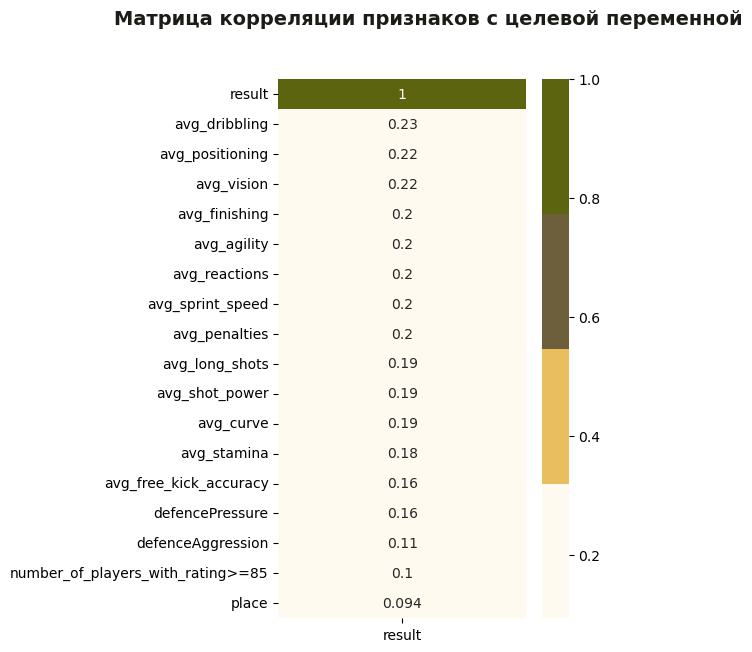

In [52]:
phik_overview = teams_df.query('season == "2015/2016"')[['number_of_players_with_rating>=85', 
               'defencePressure', 
               'defenceAggression', 
               'avg_reactions', 
               'avg_vision', 
               'avg_finishing', 
               'avg_dribbling',
               'avg_curve',
               'avg_free_kick_accuracy',
               'avg_sprint_speed',
               'avg_agility',
               'avg_shot_power',
               'avg_stamina',
               'avg_long_shots',
               'avg_positioning',
               'avg_penalties',
               'place',
               'result']].phik_matrix()

fig = plt.figure(figsize=(4, 7))
fig.suptitle('Матрица корреляции признаков с целевой переменной', fontsize=14, fontweight='demi', color='#1B1B17')
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(phik_overview[['result']].sort_values(ascending=False, by='result'),
            ax=ax1, 
            cmap=['#fefaef', '#E8BE5E', '#6D5E3C', '#5c640f'], 
            annot=True)

plt.show()
# построение тепловой карты

In [53]:
#excel_file = pd.ExcelWriter('teams_df_cor.xlsx')
#teams_df.to_excel(excel_file)
#excel_file.save()

## Модель множественной классификации

In [54]:
teams_df.head()

,id,country_id,country,league_id,league,season,stage,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,goals_scored,missed_goals,place,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_overall_rating,avg_potential,avg_finishing,avg_heading_accuracy,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_ball_control,avg_acceleration,avg_sprint_speed,avg_agility,avg_reactions,avg_shot_power,avg_jumping,avg_stamina,avg_strength,avg_long_shots,avg_interceptions,avg_positioning,avg_vision,avg_penalties,avg_marking,avg_standing_tackle,avg_sliding_tackle,avg_gk_diving,avg_gk_handling,avg_gk_kicking,avg_gk_positioning,avg_gk_reflexes,number_of_players_with_rating>=85,goals_diff,result,win_name,avg_coeff
0,307,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-07-31,2009,2009-07-01,665318,9985,232.0,Standard de Liège,9997,Sint-Truidense VV,2,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.808501,74.817387,55.960612,64.526679,62.936322,54.201469,55.148179,65.854496,70.959165,71.189715,71.984166,71.261495,64.145491,72.947382,72.196896,71.444269,57.856927,57.832706,61.420485,64.437710,61.882694,49.327056,55.058245,52.230112,14.185890,17.363263,32.378769,18.350978,19.079602,0.0,0,draw,draw,1.200
1,308,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02,2009,2009-08-01,665320,9986,670.0,Sporting Charleroi,8342,Club Brugge KV,1,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,lose,8342,2.550
2,309,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-02,2009,2009-08-01,665321,9984,1750.0,KSV Cercle Brugge,9991,KAA Gent,1,3,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.778758,66.407886,51.892321,58.159394,52.125379,48.317493,52.629870,58.233074,59.949925,64.011954,61.151951,63.762197,61.235839,63.896442,68.171040,64.413212,54.753202,57.412931,58.588969,63.331921,57.768039,48.037908,51.752491,51.047590,13.977978,19.859168,35.236765,19.588399,18.908092,0.0,2,lose,9991,2.660
3,310,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01,2009,2009-08-01,665322,9994,2007.0,Sporting Lokeren,10000,SV Zulte-Waregem,1,1,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599830,68.178904,45.837889,52.972849,55.038891,NaN,49.711835,61.733900,64.616344,62.229927,NaN,64.512423,62.781675,NaN,62.578592,64.240575,50.642890,56.755838,57.296594,NaN,57.646096,43.274332,46.455425,NaN,14.204784,20.851918,38.167292,20.505377,21.920433,0.0,0,draw,draw,2.025
4,311,1,Belgium,1,Belgium Jupiler League,2009/2010,1,2009-08-01,2009,2009-08-01,665323,8571,100081.0,KV Kortrijk,8635,RSC Anderlecht,0,2,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.521323,67.110101,45.098531,51.655474,48.947866,NaN,47.446495,56.295910,65.316549,66.379066,NaN,62.271180,58.510041,NaN,68.453976,61.802885,49.832253,55.813510,56.961317,NaN,55.705385,46.370312,50.301391,NaN,13.066070,21.687654,40.168090,22.308144,20.896858,0.0,2,lose,8635,5.500


In [55]:
teams_df.columns

Index(['id', 'country_id', 'country', 'league_id', 'league', 'season', 'stage',
       'date', 'year', 'month_year', 'match_api_id', 'team_api_id',
       'team_fifa_api_id', 'team_long_name', 'opposing_team_api_id',
       'opposing_team_long_name', 'goals_scored', 'missed_goals', 'place',
       'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
       'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth', 'avg_overall_rating', 'avg_potential',
       'avg_finishing', 'avg_heading_accuracy', 'avg_dribbling', 'avg_curve',
       'avg_free_kick_accuracy', 'avg_ball_control', 'avg_acceleration',
       'avg_sprint_speed', 'avg_agility', 'avg_reactions', 'avg_shot_power',
       'avg_jumping', 'avg_stamina', 'avg_strength', 'avg_long_shots',
       'avg_interceptions', 'avg_positioning', 'avg_vision', 'avg_penalties',
       'avg_marking', 'avg_standing_tackle', 'avg_sliding_tac

In [56]:
teams_df_model = teams_df[[
               'season', 'stage',
               'country',
               'league',
               'date', 'year', 'month_year', 'match_api_id', 'team_api_id',
               'team_fifa_api_id', 'team_long_name', 'opposing_team_api_id',
               'opposing_team_long_name', 'place', 
               'defencePressure', 
               'defenceAggression', 
               'avg_reactions', 
               'avg_vision', 
               'avg_finishing', 
               'avg_dribbling',
               'avg_curve',
               'avg_free_kick_accuracy',
               'avg_sprint_speed',
               'avg_agility',
               'avg_shot_power',
               'avg_stamina',
               'avg_long_shots',
               'avg_positioning',
               'avg_penalties',
               'number_of_players_with_rating>=85',
               'goals_diff', 
               'missed_goals', 
               'goals_scored',
               'win_name',
               'result']]

In [57]:
len(teams_df_model['team_api_id'].unique())

285

In [58]:
teams_df_model.isna().sum()

season                                  0
stage                                   0
country                                 0
league                                  0
date                                    0
year                                    0
month_year                              0
match_api_id                            0
team_api_id                             0
team_fifa_api_id                      194
team_long_name                          0
opposing_team_api_id                    0
opposing_team_long_name                 0
place                                   0
defencePressure                      7676
defenceAggression                    7676
avg_reactions                        4047
avg_vision                           5574
avg_finishing                        4047
avg_dribbling                        4047
avg_curve                            5574
avg_free_kick_accuracy               4047
avg_sprint_speed                     4047
avg_agility                       

In [59]:
teams_df_model = teams_df_model[~((teams_df_model['defencePressure'].isna()) & (teams_df_model['defenceAggression'].isna()))]

In [60]:
teams_df_model = teams_df_model[~((teams_df_model['avg_reactions'].isna()) 
                & (teams_df_model['avg_finishing'].isna()) 
                & (teams_df_model['avg_dribbling'].isna())
                & (teams_df_model['avg_free_kick_accuracy'].isna())
                & (teams_df_model['avg_sprint_speed'].isna())
                & (teams_df_model['avg_shot_power'].isna())
                & (teams_df_model['avg_stamina'].isna())
                & (teams_df_model['avg_long_shots'].isna())
                & (teams_df_model['avg_positioning'].isna())
                & (teams_df_model['avg_penalties'].isna()))]

In [61]:
teams_df_model = teams_df_model[~((teams_df_model['avg_vision'].isna()) 
                & (teams_df_model['avg_curve'].isna()) 
                & (teams_df_model['avg_agility'].isna()))]

In [62]:
teams_df_model.isna().sum()

season                               0
stage                                0
country                              0
league                               0
date                                 0
year                                 0
month_year                           0
match_api_id                         0
team_api_id                          0
team_fifa_api_id                     0
team_long_name                       0
opposing_team_api_id                 0
opposing_team_long_name              0
place                                0
defencePressure                      0
defenceAggression                    0
avg_reactions                        0
avg_vision                           0
avg_finishing                        0
avg_dribbling                        0
avg_curve                            0
avg_free_kick_accuracy               0
avg_sprint_speed                     0
avg_agility                          0
avg_shot_power                       0
avg_stamina              

In [63]:
len(teams_df_model['team_api_id'].unique())

270

In [64]:
len(set(list(teams_df_model.query('season == "2013/2014"')['team_api_id'].unique())))

172

In [65]:
len(set(list(teams_df_model.query('season == "2015/2016"')['team_api_id'].unique())))

176

In [66]:
teams_df_model_2014 = teams_df_model.query('season == "2013/2014"').reset_index(drop=True)
teams_df_model_2016 = teams_df_model.query('season == "2015/2016"').reset_index(drop=True)

In [67]:
teams_list = list(teams_df_model_2014['team_api_id'].unique())

In [68]:
delete_teams = [a for a in pd.unique(teams_df_model_2016['opposing_team_api_id']) if a not in teams_list]
for id_num in delete_teams:
    teams_df_model_2016 = teams_df_model_2016[teams_df_model_2016['team_api_id'] != id_num]
    teams_df_model_2016 = teams_df_model_2016[teams_df_model_2016['opposing_team_api_id'] != id_num]
teams_df_model_2016 = teams_df_model_2016.reset_index(drop=True)

In [69]:
teams_list = list(teams_df_model_2016['team_api_id'].unique())

In [70]:
delete_teams = [a for a in pd.unique(teams_df_model_2014['opposing_team_api_id']) if a not in teams_list]
for id_num in delete_teams:
    teams_df_model_2014 = teams_df_model_2014[teams_df_model_2014['team_api_id'] != id_num]
    teams_df_model_2014 = teams_df_model_2014[teams_df_model_2014['opposing_team_api_id'] != id_num]
teams_df_model_2014 = teams_df_model_2014.reset_index(drop=True)

In [71]:
len(teams_df_model_2014['team_api_id'].unique())

139

In [72]:
len(teams_df_model_2016['team_api_id'].unique())

139

In [73]:
def calculate_team_stat(data, team):
    goals_scored_agg = 0
    goals_missed_agg = 0
    
    match_win = 0
    match_draw = 0
    match_lost = 0
    
    total_score = 0
    
    match_count = 0
    
    defencePressure_agg = 0                      
    defenceAggression_agg = 0                    
    reactions_agg = 0                        
    vision_agg = 0                           
    finishing_agg = 0                        
    dribbling_agg = 0                        
    curve_agg = 0                            
    free_kick_accuracy_agg = 0               
    sprint_speed_agg = 0                     
    agility_agg = 0                          
    shot_power_agg = 0                       
    stamina_agg = 0                          
    long_shots_agg = 0                       
    positioning_agg = 0                      
    penalties_agg = 0                        
    top_players_agg = 0
    
    for i in range(len(data)):
        
        if (data['team_api_id'][i] == team):
            match_count += 1
            
            goals_scored_agg += data['goals_scored'][i]
            goals_missed_agg += data['missed_goals'][i]
            
            if (data['goals_scored'][i] > data['missed_goals'][i]):
                total_score += 3
                match_win += 1
            elif (data['goals_scored'][i] < data['missed_goals'][i]):
                match_lost += 1
            else:
                total_score += 1
                match_draw += 1
                
            defencePressure_agg += data['defencePressure'][i]                      
            defenceAggression_agg += data['defenceAggression'][i]                    
            reactions_agg += data['avg_reactions'][i]                         
            vision_agg += data['avg_vision'][i]                           
            finishing_agg += data['avg_finishing'][i]                        
            dribbling_agg += data['avg_dribbling'][i]                       
            curve_agg += data['avg_curve'][i]                            
            free_kick_accuracy_agg += data['avg_free_kick_accuracy'][i]               
            sprint_speed_agg += data['avg_sprint_speed'][i]                    
            agility_agg += data['avg_agility'][i]                          
            shot_power_agg += data['avg_shot_power'][i]                     
            stamina_agg += data['avg_stamina'][i]                         
            long_shots_agg += data['avg_long_shots'][i]                       
            positioning_agg += data['avg_positioning'][i]                     
            penalties_agg += data['avg_penalties'][i]                      
            top_players_agg += data['number_of_players_with_rating>=85'][i] 
            
    avg_defencePressure_agg = round(defencePressure_agg / match_count, 2)                      
    avg_defenceAggression_agg = round(defenceAggression_agg / match_count, 2)                    
    avg_reactions_agg = round(reactions_agg / match_count, 2)                         
    avg_vision_agg = round(vision_agg / match_count, 2)                           
    avg_finishing_agg = round(finishing_agg / match_count, 2)                        
    avg_dribbling_agg = round(dribbling_agg / match_count, 2)                      
    avg_curve_agg = round(curve_agg / match_count, 2)                           
    avg_free_kick_accuracy_agg = round(free_kick_accuracy_agg / match_count, 2)              
    avg_sprint_speed_agg = round(sprint_speed_agg / match_count, 2)                   
    avg_agility_agg = round(agility_agg / match_count, 2)                        
    avg_shot_power_agg = round(shot_power_agg / match_count, 2)                    
    avg_stamina_agg = round(stamina_agg / match_count, 2)                   
    avg_long_shots_agg = round(long_shots_agg / match_count, 2)                       
    avg_positioning_agg = round(positioning_agg / match_count, 2)                
    avg_penalties_agg = round(penalties_agg / match_count, 2)                   
    avg_top_players_agg = round(top_players_agg / match_count, 2)
                
    return [match_win,
            match_draw,
            match_lost,
            goals_scored_agg, 
            goals_missed_agg,
            total_score,
            avg_defencePressure_agg,
            avg_defenceAggression_agg,
            avg_reactions_agg,
            avg_vision_agg,
            avg_finishing_agg,
            avg_dribbling_agg,
            avg_curve_agg,
            avg_free_kick_accuracy_agg,
            avg_sprint_speed_agg,
            avg_agility_agg,
            avg_shot_power_agg,
            avg_stamina_agg,
            avg_long_shots_agg,
            avg_positioning_agg,
            avg_penalties_agg,
            avg_top_players_agg]

In [74]:
calculate_team_stat(teams_df_model_2016, 9991)

[1,
 1,
 0,
 5,
 3,
 4,
 49.0,
 54.0,
 64.73,
 61.06,
 50.6,
 59.94,
 51.6,
 49.88,
 66.78,
 63.3,
 62.67,
 67.68,
 54.65,
 56.09,
 51.55,
 0.0]

In [75]:
def calculate_all_team_stat(data):
    place_cat = collections.defaultdict(list)
    for team in teams_list:
        team_vector = calculate_team_stat(data, team)
        place_cat[team] = team_vector
    return place_cat

In [76]:
calculate_all_team_stat(teams_df_model_2016)

defaultdict(list,
            {9991: [1,
              1,
              0,
              5,
              3,
              4,
              49.0,
              54.0,
              64.73,
              61.06,
              50.6,
              59.94,
              51.6,
              49.88,
              66.78,
              63.3,
              62.67,
              67.68,
              54.65,
              56.09,
              51.55,
              0.0],
             8475: [0,
              0,
              2,
              2,
              8,
              0,
              27.0,
              32.0,
              61.16,
              52.3,
              43.54,
              56.37,
              51.76,
              47.36,
              69.51,
              65.85,
              59.89,
              66.1,
              48.56,
              51.41,
              50.5,
              0.0],
             9825: [9,
              3,
              4,
              23,
              16,
             

In [77]:
def get_train_data(data):
    total_matches = 0
    
    place_cat = data
    total_matches += len(place_cat.index)
    num_features = len(calculate_team_stat(teams_df_model_2016, 8573)) #определение размерности
    x_train = np.zeros((total_matches, num_features))
    y_train = np.zeros((total_matches))
    index_count = 0
    
    team_vectors = calculate_all_team_stat(data)
    place_cat = data
    total_matches_cat = len(place_cat.index)
    x_train_cat = np.zeros((total_matches_cat, num_features))
    y_train_cat = np.zeros((total_matches_cat))
    count = 0
    
    for index, row in place_cat.iterrows():
        team = row['team_api_id']
        team_vector = team_vectors[team]
        rival = row['opposing_team_api_id']
        rival_vector = team_vectors[rival]
           
        difference = [a - b for a, b in zip(team_vector, rival_vector)]
            
        if len(difference) != 0:
            x_train_cat[count] = difference
        if team == row['win_name']:
            y_train_cat[count] = 2
        elif rival == row['win_name']: 
            y_train_cat[count] = 0
        else:
            y_train_cat[count] = 1
        count += 1   
    x_train[index_count:total_matches_cat+index_count] = x_train_cat
    y_train[index_count:total_matches_cat+index_count] = y_train_cat
    index_count += total_matches_cat
    return x_train, y_train

3 исхода: 
* 2 - win 
* 0 - lose
* 1 - draw 

Для команд, которые играют дома:

In [78]:
x_train, y_train = get_train_data(teams_df_model_2016)

In [79]:
x_train, y_train

(array([[ 0.  ,  0.  ,  0.  , ...,  0.82, -3.74,  0.  ],
        [-1.  , -1.  ,  2.  , ..., -3.86, -4.79,  0.  ],
        [-1.  , -1.  ,  2.  , ..., -4.68, -1.05,  0.  ],
        ...,
        [-2.  , -3.  ,  5.  , ...,  2.16, -2.39,  0.  ],
        [-3.  ,  1.  ,  2.  , ...,  0.79,  3.37,  0.  ],
        [ 4.  , -4.  ,  0.  , ...,  0.55,  4.38,  0.  ]]),
 array([1., 0., 0., ..., 0., 0., 0.]))

In [80]:
clf = LogisticRegression()

In [81]:
clf = clf.fit(x_train, y_train)

In [82]:
def create_prediction(team_1_vector, team_2_vector):
    difference = [[a - b for a, b in zip(team_1_vector, team_2_vector)]]
    predictions = clf.predict(difference)
    y_proba = clf.predict_proba(difference)
    return predictions, y_proba

In [83]:
team_1_id = 9991
team_2_id = 8475

create_prediction(calculate_team_stat(teams_df_model_2014, team_1_id), calculate_team_stat(teams_df_model_2014, team_2_id))

(array([2.]), array([[0.18565172, 0.27248099, 0.5418673 ]]))

In [84]:
team_1_id = 8475
team_2_id = 9991

create_prediction(calculate_team_stat(teams_df_model_2014, team_1_id), calculate_team_stat(teams_df_model_2014, team_2_id))

(array([0.]), array([[0.53617129, 0.27030676, 0.19352196]]))

In [85]:
team_1_id = 8573
team_2_id = 9991

create_prediction(calculate_team_stat(teams_df_model_2014, team_1_id), calculate_team_stat(teams_df_model_2014, team_2_id))

(array([2.]), array([[0.33848482, 0.29399394, 0.36752124]]))

In [86]:
teams_df_model_2014.head()

,season,stage,country,league,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,place,defencePressure,defenceAggression,avg_reactions,avg_vision,avg_finishing,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_sprint_speed,avg_agility,avg_shot_power,avg_stamina,avg_long_shots,avg_positioning,avg_penalties,number_of_players_with_rating>=85,goals_diff,missed_goals,goals_scored,win_name,result
0,2013/2014,1,Belgium,Belgium Jupiler League,2014-03-29,2014,2014-03-01,1677180,9991,674.0,KAA Gent,8573,KV Oostende,home,55.0,59.0,65.339235,55.397775,46.354064,56.344551,48.332327,48.875162,66.663917,64.972907,58.450497,69.265241,52.523987,53.050341,51.412803,0.0,1,1,0,8573,lose
1,2013/2014,2,Belgium,Belgium Jupiler League,2014-04-05,2014,2014-04-01,1677182,8573,682.0,KV Oostende,8475,Waasland-Beveren,home,42.0,47.0,62.340751,55.654814,46.783264,56.110913,49.707601,50.655574,64.657375,64.573781,59.103688,65.556163,51.110653,51.806519,55.437054,0.0,0,0,0,draw,draw
2,2013/2014,3,Belgium,Belgium Jupiler League,2014-04-12,2014,2014-04-01,1677183,9991,674.0,KAA Gent,8475,Waasland-Beveren,home,55.0,59.0,65.638598,57.128201,48.478734,59.331399,53.639477,50.579524,68.397839,67.440426,62.283966,66.757644,54.435490,54.403196,51.202756,0.0,1,1,2,9991,win
3,2013/2014,4,Belgium,Belgium Jupiler League,2014-04-19,2014,2014-04-01,1677185,8475,110913.0,Waasland-Beveren,9991,KAA Gent,home,25.0,37.0,63.610920,53.491080,43.178043,52.914205,41.473345,43.624194,64.376867,62.793693,61.131718,65.452944,47.746806,47.203726,51.527799,0.0,2,4,2,9991,lose
4,2013/2014,5,Belgium,Belgium Jupiler League,2014-04-26,2014,2014-04-01,1677188,8573,682.0,KV Oostende,9991,KAA Gent,home,42.0,47.0,62.532138,54.436382,47.087404,55.251412,49.607955,51.173231,65.161067,63.316370,60.810418,65.752153,52.899021,52.387599,56.274374,0.0,0,1,1,draw,draw


In [87]:
prediction = []
for i in range(len(teams_df_model_2014)):
    pred, y_prob = create_prediction(calculate_team_stat(teams_df_model_2014, teams_df_model_2014['team_api_id'][i]), calculate_team_stat(teams_df_model_2014, teams_df_model_2014['opposing_team_api_id'][i]))
    prediction.append(pred[0])

In [88]:
teams_df_model_2014['prediction'] = prediction

In [89]:
teams_df_model_2014

,season,stage,country,league,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,place,defencePressure,defenceAggression,avg_reactions,avg_vision,avg_finishing,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_sprint_speed,avg_agility,avg_shot_power,avg_stamina,avg_long_shots,avg_positioning,avg_penalties,number_of_players_with_rating>=85,goals_diff,missed_goals,goals_scored,win_name,result,prediction
0,2013/2014,1,Belgium,Belgium Jupiler League,2014-03-29,2014,2014-03-01,1677180,9991,674.0,KAA Gent,8573,KV Oostende,home,55.0,59.0,65.339235,55.397775,46.354064,56.344551,48.332327,48.875162,66.663917,64.972907,58.450497,69.265241,52.523987,53.050341,51.412803,0.0,1,1,0,8573,lose,0.0
1,2013/2014,2,Belgium,Belgium Jupiler League,2014-04-05,2014,2014-04-01,1677182,8573,682.0,KV Oostende,8475,Waasland-Beveren,home,42.0,47.0,62.340751,55.654814,46.783264,56.110913,49.707601,50.655574,64.657375,64.573781,59.103688,65.556163,51.110653,51.806519,55.437054,0.0,0,0,0,draw,draw,2.0
2,2013/2014,3,Belgium,Belgium Jupiler League,2014-04-12,2014,2014-04-01,1677183,9991,674.0,KAA Gent,8475,Waasland-Beveren,home,55.0,59.0,65.638598,57.128201,48.478734,59.331399,53.639477,50.579524,68.397839,67.440426,62.283966,66.757644,54.435490,54.403196,51.202756,0.0,1,1,2,9991,win,2.0
3,2013/2014,4,Belgium,Belgium Jupiler League,2014-04-19,2014,2014-04-01,1677185,8475,110913.0,Waasland-Beveren,9991,KAA Gent,home,25.0,37.0,63.610920,53.491080,43.178043,52.914205,41.473345,43.624194,64.376867,62.793693,61.131718,65.452944,47.746806,47.203726,51.527799,0.0,2,4,2,9991,lose,0.0
4,2013/2014,5,Belgium,Belgium Jupiler League,2014-04-26,2014,2014-04-01,1677188,8573,682.0,KV Oostende,9991,KAA Gent,home,42.0,47.0,62.532138,54.436382,47.087404,55.251412,49.607955,51.173231,65.161067,63.316370,60.810418,65.752153,52.899021,52.387599,56.274374,0.0,0,1,1,draw,draw,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,2013/2014,8,Switzerland,Switzerland Super League,2013-09-22,2013,2013-09-01,1471676,10191,1715.0,FC Thun,9956,Grasshopper Club Zürich,away,47.0,45.0,57.684393,55.433648,49.335791,56.874095,46.570071,49.267631,65.688940,62.332715,59.127041,66.281878,51.814939,55.565267,49.074604,0.0,1,2,1,9956,lose,0.0
3623,2013/2014,8,Switzerland,Switzerland Super League,2013-09-22,2013,2013-09-01,1471677,9931,896.0,FC Basel,10179,FC Sion,away,47.0,58.0,66.951650,59.691531,48.592668,58.665095,56.798875,52.195274,71.521702,71.801971,65.307590,70.419065,52.213417,55.499321,55.773537,0.0,2,1,3,9931,win,2.0
3624,2013/2014,9,Switzerland,Switzerland Super League,2013-09-25,2013,2013-09-01,1471679,9931,896.0,FC Basel,10191,FC Thun,away,47.0,58.0,67.182844,60.099242,49.717065,59.904573,55.499536,54.315440,74.042317,73.135208,65.873308,74.085697,52.366281,54.838924,56.386671,0.0,2,0,2,9931,win,2.0
3625,2013/2014,9,Switzerland,Switzerland Super League,2013-09-25,2013,2013-09-01,1471681,9956,322.0,Grasshopper Club Zürich,10199,FC Luzern,away,36.0,43.0,61.652003,51.759864,43.812428,56.064081,42.601562,46.906567,66.976329,64.610493,61.984947,66.020218,49.732018,54.965430,52.610956,0.0,2,0,2,9956,win,2.0


In [90]:
teams_df_model_2014['prediction_name'] = teams_df_model_2014['prediction'].apply(lambda x: 'win' if x == 2 else ('lose' if x == 0 else 'draw'))

In [91]:
teams_df_model_2014.head()

,season,stage,country,league,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,place,defencePressure,defenceAggression,avg_reactions,avg_vision,avg_finishing,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_sprint_speed,avg_agility,avg_shot_power,avg_stamina,avg_long_shots,avg_positioning,avg_penalties,number_of_players_with_rating>=85,goals_diff,missed_goals,goals_scored,win_name,result,prediction,prediction_name
0,2013/2014,1,Belgium,Belgium Jupiler League,2014-03-29,2014,2014-03-01,1677180,9991,674.0,KAA Gent,8573,KV Oostende,home,55.0,59.0,65.339235,55.397775,46.354064,56.344551,48.332327,48.875162,66.663917,64.972907,58.450497,69.265241,52.523987,53.050341,51.412803,0.0,1,1,0,8573,lose,0.0,lose
1,2013/2014,2,Belgium,Belgium Jupiler League,2014-04-05,2014,2014-04-01,1677182,8573,682.0,KV Oostende,8475,Waasland-Beveren,home,42.0,47.0,62.340751,55.654814,46.783264,56.110913,49.707601,50.655574,64.657375,64.573781,59.103688,65.556163,51.110653,51.806519,55.437054,0.0,0,0,0,draw,draw,2.0,win
2,2013/2014,3,Belgium,Belgium Jupiler League,2014-04-12,2014,2014-04-01,1677183,9991,674.0,KAA Gent,8475,Waasland-Beveren,home,55.0,59.0,65.638598,57.128201,48.478734,59.331399,53.639477,50.579524,68.397839,67.440426,62.283966,66.757644,54.435490,54.403196,51.202756,0.0,1,1,2,9991,win,2.0,win
3,2013/2014,4,Belgium,Belgium Jupiler League,2014-04-19,2014,2014-04-01,1677185,8475,110913.0,Waasland-Beveren,9991,KAA Gent,home,25.0,37.0,63.610920,53.491080,43.178043,52.914205,41.473345,43.624194,64.376867,62.793693,61.131718,65.452944,47.746806,47.203726,51.527799,0.0,2,4,2,9991,lose,0.0,lose
4,2013/2014,5,Belgium,Belgium Jupiler League,2014-04-26,2014,2014-04-01,1677188,8573,682.0,KV Oostende,9991,KAA Gent,home,42.0,47.0,62.532138,54.436382,47.087404,55.251412,49.607955,51.173231,65.161067,63.316370,60.810418,65.752153,52.899021,52.387599,56.274374,0.0,0,1,1,draw,draw,2.0,win


In [92]:
def check_prediction(df):
    if df['result'] == df['prediction_name']:
        return 1
    else:
        return 0

In [93]:
teams_df_model_2014['check_prediction'] = teams_df_model_2014.apply(check_prediction, axis=1)

In [94]:
teams_df_model_2014.head()

,season,stage,country,league,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,place,defencePressure,defenceAggression,avg_reactions,avg_vision,avg_finishing,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_sprint_speed,avg_agility,avg_shot_power,avg_stamina,avg_long_shots,avg_positioning,avg_penalties,number_of_players_with_rating>=85,goals_diff,missed_goals,goals_scored,win_name,result,prediction,prediction_name,check_prediction
0,2013/2014,1,Belgium,Belgium Jupiler League,2014-03-29,2014,2014-03-01,1677180,9991,674.0,KAA Gent,8573,KV Oostende,home,55.0,59.0,65.339235,55.397775,46.354064,56.344551,48.332327,48.875162,66.663917,64.972907,58.450497,69.265241,52.523987,53.050341,51.412803,0.0,1,1,0,8573,lose,0.0,lose,1
1,2013/2014,2,Belgium,Belgium Jupiler League,2014-04-05,2014,2014-04-01,1677182,8573,682.0,KV Oostende,8475,Waasland-Beveren,home,42.0,47.0,62.340751,55.654814,46.783264,56.110913,49.707601,50.655574,64.657375,64.573781,59.103688,65.556163,51.110653,51.806519,55.437054,0.0,0,0,0,draw,draw,2.0,win,0
2,2013/2014,3,Belgium,Belgium Jupiler League,2014-04-12,2014,2014-04-01,1677183,9991,674.0,KAA Gent,8475,Waasland-Beveren,home,55.0,59.0,65.638598,57.128201,48.478734,59.331399,53.639477,50.579524,68.397839,67.440426,62.283966,66.757644,54.435490,54.403196,51.202756,0.0,1,1,2,9991,win,2.0,win,1
3,2013/2014,4,Belgium,Belgium Jupiler League,2014-04-19,2014,2014-04-01,1677185,8475,110913.0,Waasland-Beveren,9991,KAA Gent,home,25.0,37.0,63.610920,53.491080,43.178043,52.914205,41.473345,43.624194,64.376867,62.793693,61.131718,65.452944,47.746806,47.203726,51.527799,0.0,2,4,2,9991,lose,0.0,lose,1
4,2013/2014,5,Belgium,Belgium Jupiler League,2014-04-26,2014,2014-04-01,1677188,8573,682.0,KV Oostende,9991,KAA Gent,home,42.0,47.0,62.532138,54.436382,47.087404,55.251412,49.607955,51.173231,65.161067,63.316370,60.810418,65.752153,52.899021,52.387599,56.274374,0.0,0,1,1,draw,draw,2.0,win,0


In [95]:
accuracy = teams_df_model_2014['check_prediction'].sum() / teams_df_model_2014['check_prediction'].count()
accuracy

0.5456299972429005

In [108]:
win_probability = []
for i in range(len(teams_df_model_2014)):
    pred, y_prob = create_prediction(calculate_team_stat(teams_df_model_2014, teams_df_model_2014['team_api_id'][i]), calculate_team_stat(teams_df_model_2014, teams_df_model_2014['opposing_team_api_id'][i]))
    win_probability.append(y_prob[:, 2][0])

In [109]:
teams_df_model_2014['win_probability'] = win_probability

In [111]:
lose_probability = []
for i in range(len(teams_df_model_2014)):
    pred, y_prob = create_prediction(calculate_team_stat(teams_df_model_2014, teams_df_model_2014['team_api_id'][i]), calculate_team_stat(teams_df_model_2014, teams_df_model_2014['opposing_team_api_id'][i]))
    lose_probability.append(y_prob[:, 0][0])

In [112]:
teams_df_model_2014['lose_probability'] = lose_probability

In [113]:
draw_probability = []
for i in range(len(teams_df_model_2014)):
    pred, y_prob = create_prediction(calculate_team_stat(teams_df_model_2014, teams_df_model_2014['team_api_id'][i]), calculate_team_stat(teams_df_model_2014, teams_df_model_2014['opposing_team_api_id'][i]))
    draw_probability.append(y_prob[:, 1][0])

In [114]:
teams_df_model_2014['draw_probability'] = draw_probability

In [117]:
teams_df_model_2014.head()

,season,stage,country,league,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,place,defencePressure,defenceAggression,avg_reactions,avg_vision,avg_finishing,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_sprint_speed,avg_agility,avg_shot_power,avg_stamina,avg_long_shots,avg_positioning,avg_penalties,number_of_players_with_rating>=85,goals_diff,missed_goals,goals_scored,win_name,result,prediction,prediction_name,check_prediction,win_probability,lose_probability,draw_probability
0,2013/2014,1,Belgium,Belgium Jupiler League,2014-03-29,2014,2014-03-01,1677180,9991,674.0,KAA Gent,8573,KV Oostende,home,55.0,59.0,65.339235,55.397775,46.354064,56.344551,48.332327,48.875162,66.663917,64.972907,58.450497,69.265241,52.523987,53.050341,51.412803,0.0,1,1,0,8573,lose,0.0,lose,1,0.343794,0.354341,0.301865
1,2013/2014,2,Belgium,Belgium Jupiler League,2014-04-05,2014,2014-04-01,1677182,8573,682.0,KV Oostende,8475,Waasland-Beveren,home,42.0,47.0,62.340751,55.654814,46.783264,56.110913,49.707601,50.655574,64.657375,64.573781,59.103688,65.556163,51.110653,51.806519,55.437054,0.0,0,0,0,draw,draw,2.0,win,0,0.554372,0.179546,0.266082
2,2013/2014,3,Belgium,Belgium Jupiler League,2014-04-12,2014,2014-04-01,1677183,9991,674.0,KAA Gent,8475,Waasland-Beveren,home,55.0,59.0,65.638598,57.128201,48.478734,59.331399,53.639477,50.579524,68.397839,67.440426,62.283966,66.757644,54.435490,54.403196,51.202756,0.0,1,1,2,9991,win,2.0,win,1,0.541867,0.185652,0.272481
3,2013/2014,4,Belgium,Belgium Jupiler League,2014-04-19,2014,2014-04-01,1677185,8475,110913.0,Waasland-Beveren,9991,KAA Gent,home,25.0,37.0,63.610920,53.491080,43.178043,52.914205,41.473345,43.624194,64.376867,62.793693,61.131718,65.452944,47.746806,47.203726,51.527799,0.0,2,4,2,9991,lose,0.0,lose,1,0.193522,0.536171,0.270307
4,2013/2014,5,Belgium,Belgium Jupiler League,2014-04-26,2014,2014-04-01,1677188,8573,682.0,KV Oostende,9991,KAA Gent,home,42.0,47.0,62.532138,54.436382,47.087404,55.251412,49.607955,51.173231,65.161067,63.316370,60.810418,65.752153,52.899021,52.387599,56.274374,0.0,0,1,1,draw,draw,2.0,win,0,0.367521,0.338485,0.293994


In [103]:
clf.coef_[0]

array([-1.85803634e-02,  2.04237684e-02,  8.93333166e-02,  9.66285969e-04,
        5.10023977e-03, -3.53173219e-02, -1.18132954e-05, -2.09538932e-03,
       -1.09246908e-02, -7.99020030e-04, -2.02317562e-02,  1.81853678e-02,
        4.01335263e-03,  5.56367875e-03,  6.78283231e-03, -1.63872536e-02,
        7.48599744e-03, -4.46884567e-03,  1.97447299e-04, -1.42788810e-02,
        1.74612014e-03,  2.09254239e-02])

In [104]:
features_list = ['match_win',
            'match_draw',
            'match_lost',
            'goals_scored_agg', 
            'goals_missed_agg',
            'total_score',
            'avg_defencePressure_agg',
            'avg_defenceAggression_agg',
            'avg_reactions_agg',
            'avg_vision_agg',
            'avg_finishing_agg',
            'avg_dribbling_agg',
            'avg_curve_agg',
            'avg_free_kick_accuracy_agg',
            'avg_sprint_speed_agg',
            'avg_agility_agg',
            'avg_shot_power_agg',
            'avg_stamina_agg',
            'avg_long_shots_agg',
            'avg_positioning_agg',
            'avg_penalties_agg',
            'avg_top_players_agg']

In [105]:
for feature_number, feature_name in enumerate(features_list):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<40}: {exp_weight:+.6f}")

match_win                               : +0.981591
match_draw                              : +1.020634
match_lost                              : +1.093445
goals_scored_agg                        : +1.000967
goals_missed_agg                        : +1.005113
total_score                             : +0.965299
avg_defencePressure_agg                 : +0.999988
avg_defenceAggression_agg               : +0.997907
avg_reactions_agg                       : +0.989135
avg_vision_agg                          : +0.999201
avg_finishing_agg                       : +0.979972
avg_dribbling_agg                       : +1.018352
avg_curve_agg                           : +1.004021
avg_free_kick_accuracy_agg              : +1.005579
avg_sprint_speed_agg                    : +1.006806
avg_agility_agg                         : +0.983746
avg_shot_power_agg                      : +1.007514
avg_stamina_agg                         : +0.995541
avg_long_shots_agg                      : +1.000197
avg_position

In [106]:
#excel_file = pd.ExcelWriter('teams_df_model_2014.xlsx')
#teams_df_model_2014.to_excel(excel_file)
#excel_file.save()

In [121]:
teams_df_model_2014.query('league == "England Premier League" and team_long_name == "Liverpool" and opposing_team_long_name == "Stoke City"')

,season,stage,country,league,date,year,month_year,match_api_id,team_api_id,team_fifa_api_id,team_long_name,opposing_team_api_id,opposing_team_long_name,place,defencePressure,defenceAggression,avg_reactions,avg_vision,avg_finishing,avg_dribbling,avg_curve,avg_free_kick_accuracy,avg_sprint_speed,avg_agility,avg_shot_power,avg_stamina,avg_long_shots,avg_positioning,avg_penalties,number_of_players_with_rating>=85,goals_diff,missed_goals,goals_scored,win_name,result,prediction,prediction_name,check_prediction,win_probability,lose_probability,draw_probability
8,2013/2014,1,England,England Premier League,2013-08-17,2013,2013-08-01,1474065,8650,9.0,Liverpool,10194,Stoke City,home,59.0,52.0,75.440827,67.972997,56.691655,67.550929,65.043685,62.509814,74.912948,68.603053,73.324568,72.323467,63.995203,63.418024,63.420328,0.0,1,0,1,8650,win,2.0,win,1,0.870107,0.021711,0.108183
1918,2013/2014,21,England,England Premier League,2014-01-12,2014,2014-01-01,1474920,8650,9.0,Liverpool,10194,Stoke City,away,51.0,48.0,74.344624,66.215458,54.630934,66.213538,64.329180,56.450263,75.181395,69.542771,69.941770,74.072527,60.307592,62.475392,61.131921,1.0,2,3,5,8650,win,2.0,win,1,0.870107,0.021711,0.108183
